<a href="https://colab.research.google.com/github/DharmendraYadav96/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name    - Bike Sharing Demand Prediction**



##### **Project Type**    - Linear Regression
##### **Contribution**    - Team
##### **Team Member 1 -**
##### **Team Member 2 -**




# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Predict the bike count required at each hour for the stable supply of rental bikes.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import scipy.stats as stats

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [3]:
path = '/content/mydrive/MyDrive/Dataset/SeoulBikeData.csv'
df = pd.read_csv(path, encoding='ISO-8859-1')

### Dataset First View

In [4]:
# Dataset First Look
df.head(10).T

0           1           2           3  \
Date                       01/12/2017  01/12/2017  01/12/2017  01/12/2017   
Rented Bike Count                 254         204         173         107   
Hour                                0           1           2           3   
Temperature(°C)                  -5.2        -5.5        -6.0        -6.2   
Humidity(%)                        37          38          39          40   
Wind speed (m/s)                  2.2         0.8         1.0         0.9   
Visibility (10m)                 2000        2000        2000        2000   
Dew point temperature(°C)       -17.6       -17.6       -17.7       -17.6   
Solar Radiation (MJ/m2)           0.0         0.0         0.0         0.0   
Rainfall(mm)                      0.0         0.0         0.0         0.0   
Snowfall (cm)                     0.0         0.0         0.0         0.0   
Seasons                        Winter      Winter      Winter      Winter   
Holiday                    No Holiday  No Holiday  No Holiday  No Holiday   
Functioning Day                   Yes         Yes         Yes         Yes   

                                    4           5           6           7  \
Date                       01/12/2017  01/12/2017  01/12/2017  01/12/2017   
Rented Bike Count                  78         100         181         460   
Hour                                4           5           6           7   
Temperature(°C)                  -6.0        -6.4        -6.6        -7.4   
Humidity(%)                        36          37          35          38   
Wind speed (m/s)                  2.3         1.5         1.3         0.9   
Visibility (10m)                 2000        2000        2000        2000   
Dew point temperature(°C)       -18.6       -18.7       -19.5       -19.3   
Solar Radiation (MJ/m2)           0.0         0.0         0.0         0.0   
Rainfall(mm)                      0.0         0.0         0.0         0.0   
Snowfall (cm)                     0.0         0.0         0.0         0.0   
Seasons                        Winter      Winter      Winter      Winter   
Holiday                    No Holiday  No Holiday  No Holiday  No Holiday   
Functioning Day                   Yes         Yes         Yes         Yes   

                                    8           9  
Date                       01/12/2017  01/12/2017  
Rented Bike Count                 930         490  
Hour                                8           9  
Temperature(°C)                  -7.6        -6.5  
Humidity(%)                        37          27  
Wind speed (m/s)                  1.1         0.5  
Visibility (10m)                 2000        1928  
Dew point temperature(°C)       -19.8       -22.4  
Solar Radiation (MJ/m2)          0.01        0.23  
Rainfall(mm)                      0.0         0.0  
Snowfall (cm)                     0.0         0.0  
Seasons                        Winter      Winter  
Holiday                    No Holiday  No Holiday  
Functioning Day                   Yes         Yes

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(8760, 14)

There are 8760 rows and 14 columns

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

There are 4 object type variables which need to be converted to numerical data type for applying machine learning algorithm.

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

**There is no duplicate row.**

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

**There is no missing value.**

### What did you know about your dataset?

- Dependent variable is Rented bike count.
- No. of rows 8760 and no. of columns is 14.
- No missing values in any column and No duplicated values.
- There are 4 object type variables and other are numerical type variable.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [13]:
# Dataset Describe
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

Mean value of visibility is more than than mean value of other numerical features so the data set need to normalised.

### Variables Description

- **Date**: Current date
- **Rented Bike Count**: (Dependent variable), No. of rented bike count.
- **Hour**: Hour of the day in 24hr format.
- **Temperature(°C)**: (Numerical) Temperature at the time of booking in °C.
- **Humidity(%)**: Humidity in (%).
- **Wind speed (m/s)**: (Numerical) Wind speed in (m/s).
- **Visibility (10m)**: (Numerical) visibility in (10m).
- **Dew point temperature (°C)**: (Numerical) dew point temperature in (°C).
- **Solar Radiation (MJ/m2)**: (Numerical) Solar radiation in (MJ/m2).
- **Rainfall(mm)** : (Numerical) Rainfall in (mm).
- **Snowfall (cm)** : (Numerical) Snowfall in (cm).
- **Seasons** : (Categorical) 4 seasons.
- **Holiday** : (Categorical) Yes or No
- **Functioning Day** : (Categorical) Yes or No

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
for col in df.columns:
  print(col, ": ", df[col].nunique())
  print(df[col].unique(), "\n")

Date :  365
['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/01/2018' '29/01/2018'
 '30/01/2018' '31/01/2018' '01/02/2018' '02/02/2018' '03/02/2018'
 '04/02/2018' '05/02/2018' '06/02/2018' '07/02/2018' '08/02/2018'
 '09/02/2018' '10/02/2018' '11/02/2018' '12/02/2018' '13/02/2018

## 3. ***Data Wrangling***

### 1. Renaming column

In [15]:
df.rename(columns = {'Rented Bike Count' : 'Rented_Bike_Count',
 'Temperature(°C)' : 'Temperature',
 'Humidity(%)' : 'Humidity',
 'Wind speed (m/s)' : 'Wind_speed',
 'Visibility (10m)' : 'Visibility',
 'Dew point temperature(°C)' : 'Dew_point_temperature',
 'Solar Radiation (MJ/m2)' : 'Solar_Radiation',
 'Rainfall(mm)' : 'Rainfall',
 'Snowfall (cm)' : 'Snowfall',
 'Functioning Day' : 'Functioning_Day'}, inplace = True)

df.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

### 2. Convert date column data type to date datatype

In [16]:
# Write your code to make your dataset analysis ready.
df['Weekday'] = df['Date'].apply(lambda x : datetime.strptime(x, '%d/%m/%Y').weekday())
df['Month'] = df['Date'].apply(lambda x : datetime.strptime(x, '%d/%m/%Y').month)

In [17]:
# drop the date column
df.drop('Date', axis = 1, inplace = True)

What all manipulations have you done and insights you found?

1. Renaming the columns so that it is easier to use them in our code.
2. Extract the weekday and month from the date column and then drop the date column

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [19]:
numerical_features = ['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall']


### **Numerical features Analysis**

1. Check skewness: Distribution plot and boxplot of each numerical feature
2. Check skewness: Q-Q plot of each numerical feature
3. Check linear relationship: scatter plot wrt dependent var to check colinear relation.

#### **Skewness**

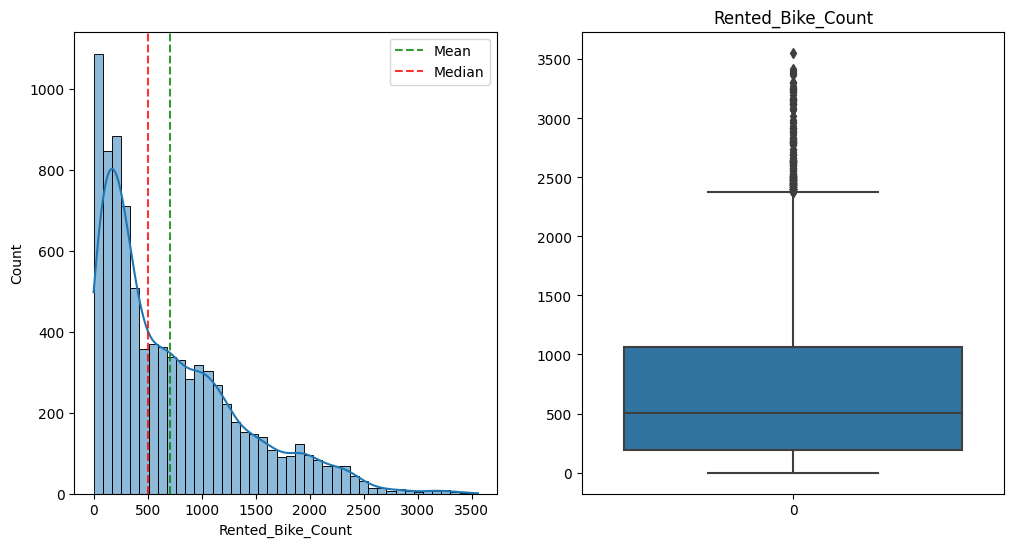

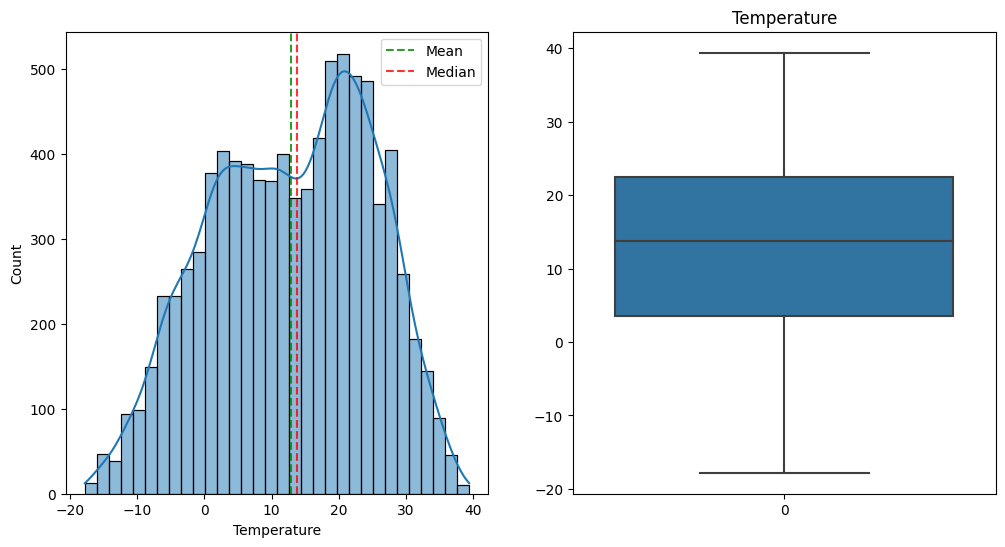

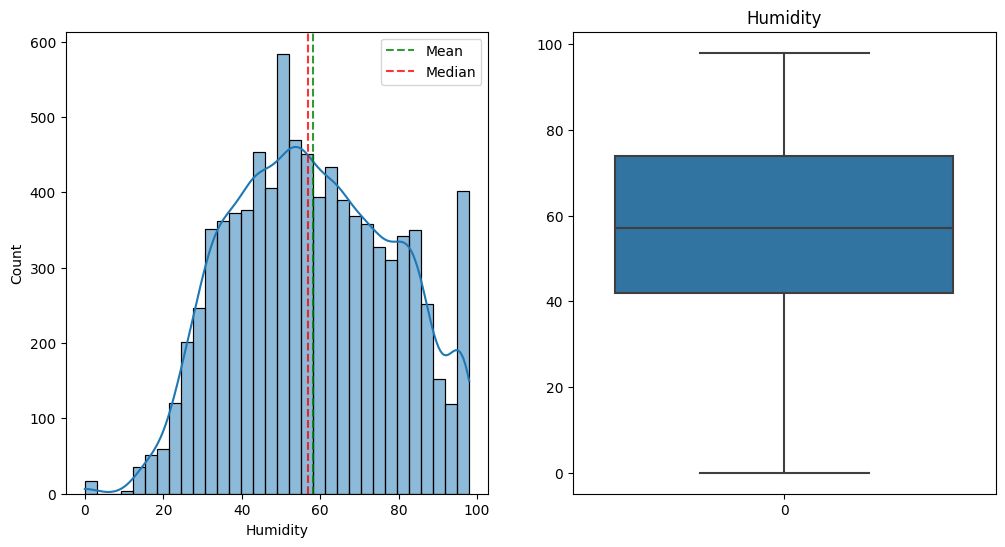

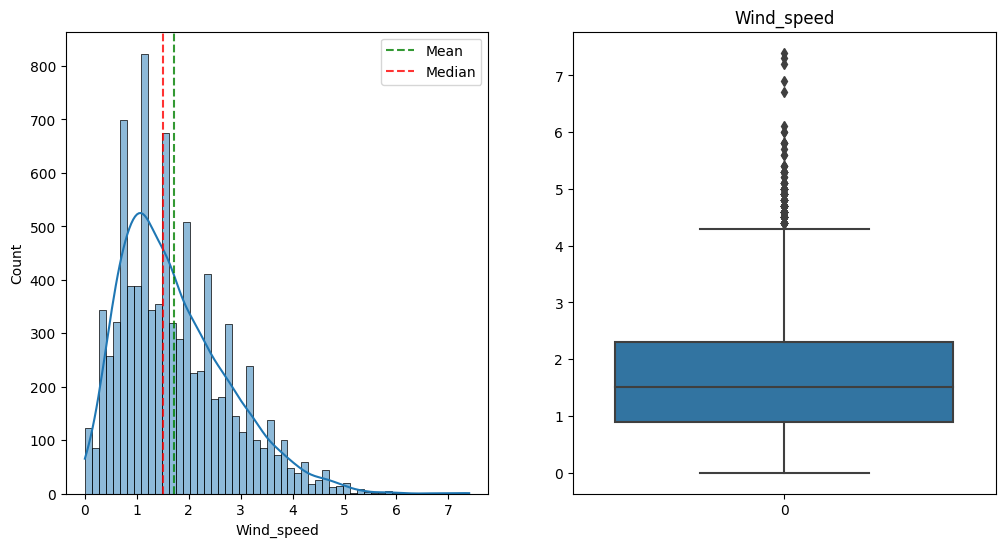

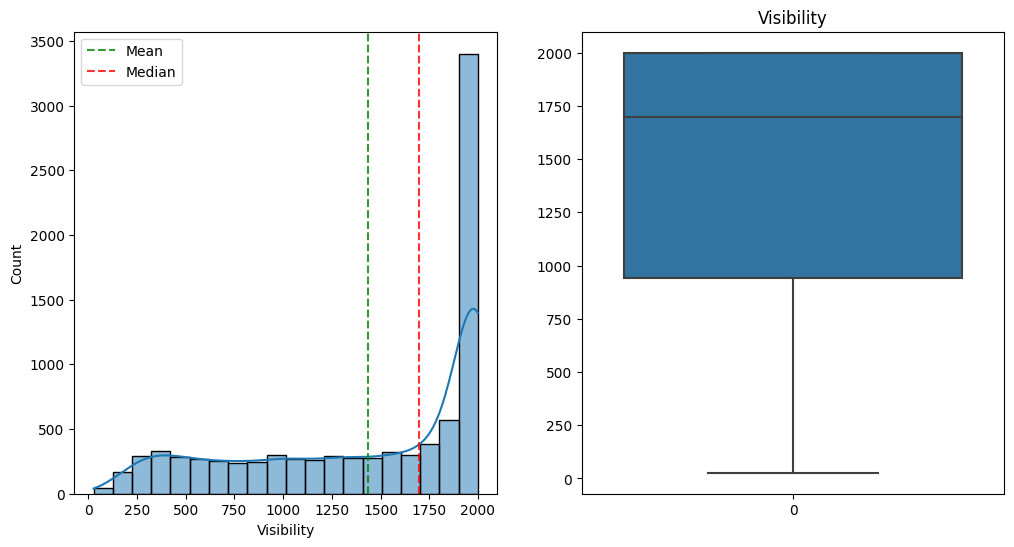

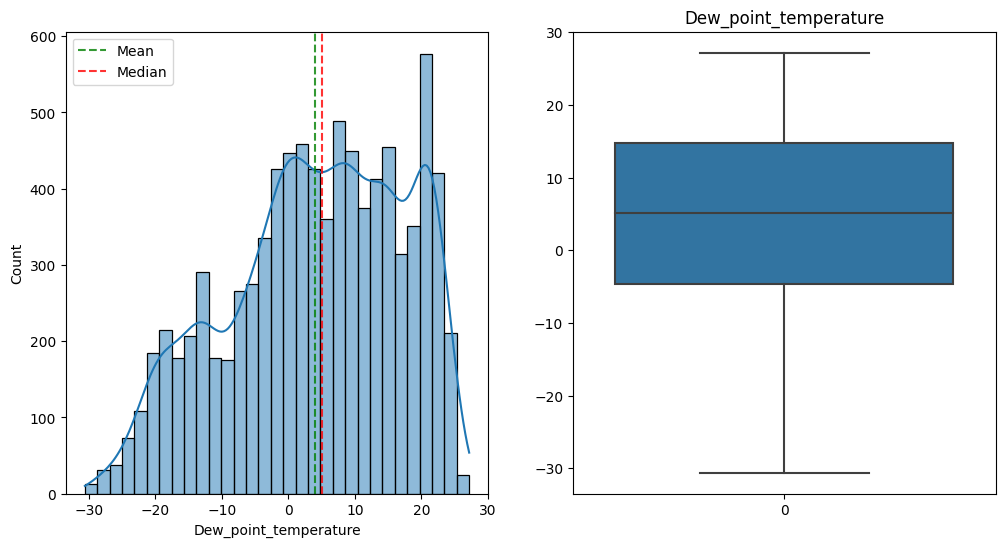

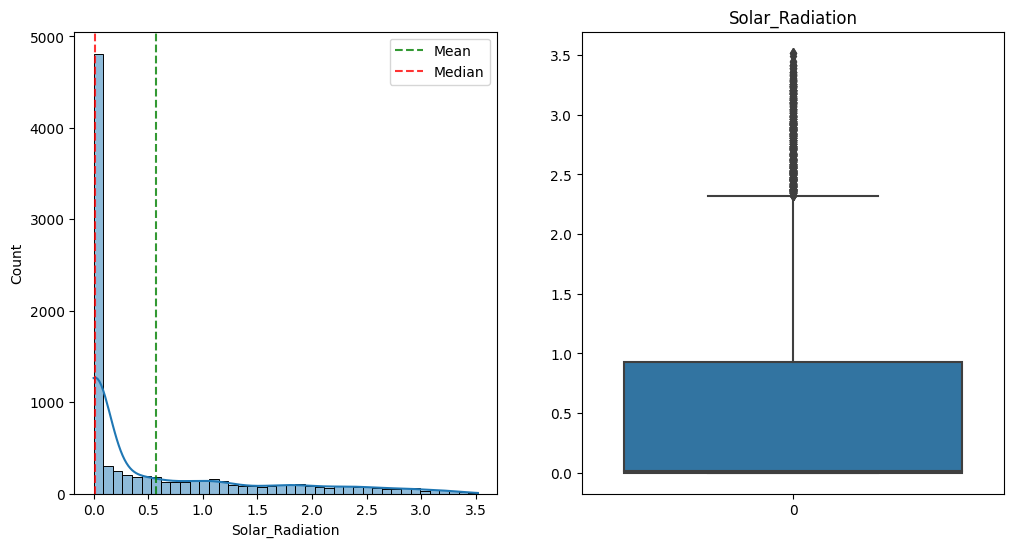

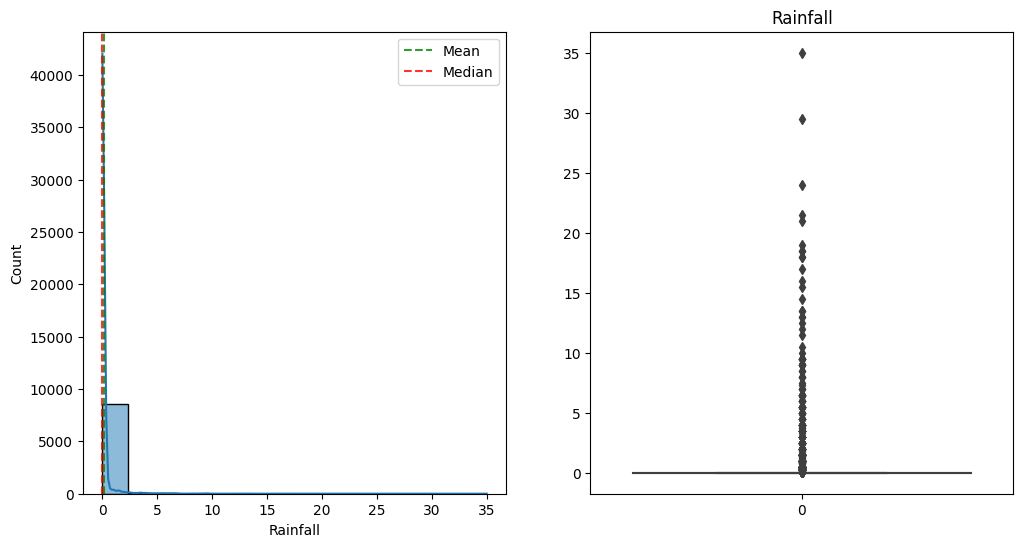

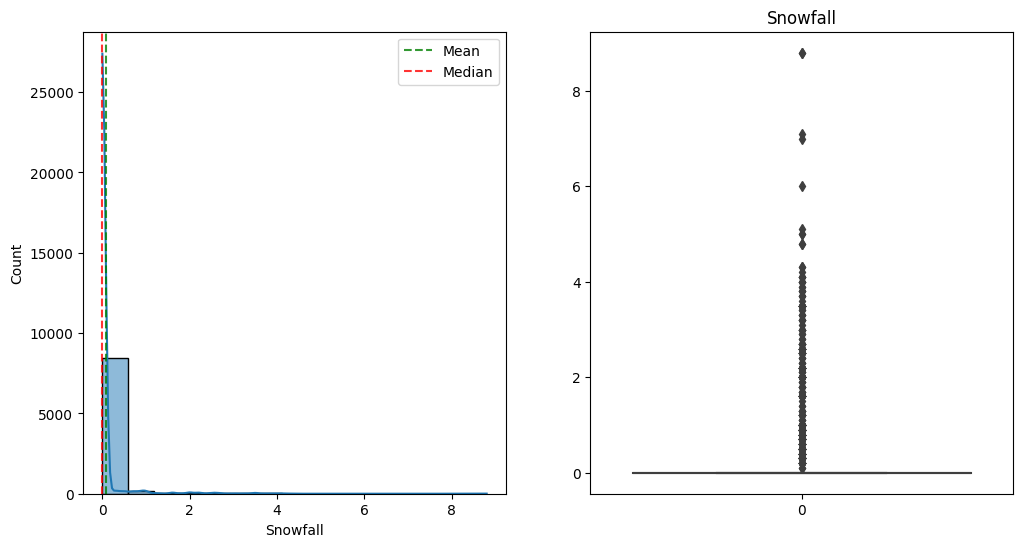

In [20]:
# Chart - 1 visualization code
for feat in numerical_features:

    # Create a 2x2 grid of subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Subplot 1: Histogram
    sns.histplot(df[feat], kde = True, ax=axs[0])
    axs[0].axvline(df[feat].mean(), color ="green", alpha = 0.8, lw = 1.5, linestyle='dashed', label = 'Mean')
    axs[0].axvline(df[feat].median(), color ="red", alpha = 0.8, lw = 1.5, linestyle='dashed', label = 'Median')
    axs[0].legend()

    # Subplot 2: Boxplot
    sns.boxplot(df[feat], ax=axs[1])
    plt.title(feat)

    # Show the plot
    plt.show()

#####  What is/are the insight(s) found from the chart?

- Rented bike count, Wind speed, Visibility, Solar radiation and Rainfall have skewed distribution.
- Except visibility all of them has outliers.
- Snowfall and Rainfall both are having few values mostly concentrated near 0.


#### **Q-Q Plot**

<Figure size 640x480 with 0 Axes>

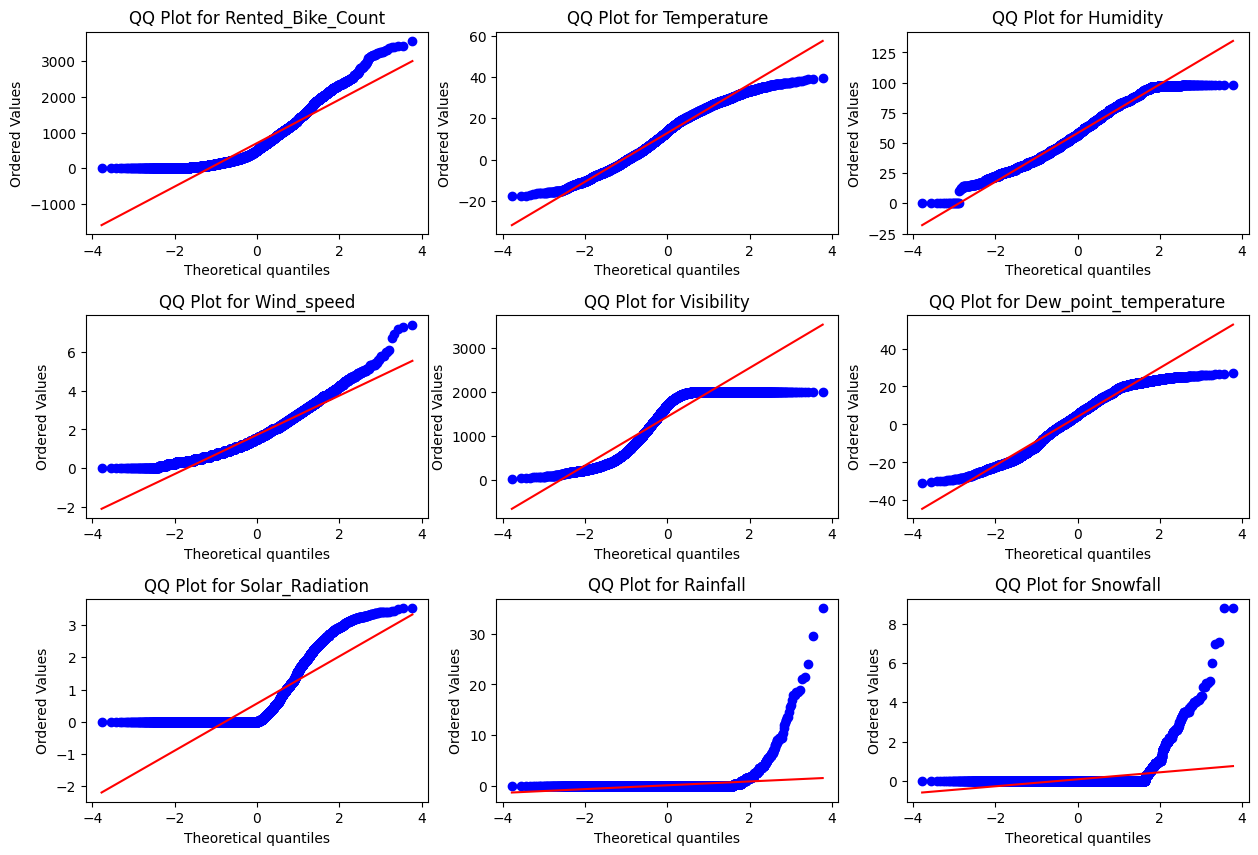

In [77]:
# Q-Q plot for all the numerical features

fig, axes = plt.subplots(3, 3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.4)
ax= axes.flatten()

for i, feat in enumerate(numerical_features):

    # Q-Q plot
    stats.probplot(df[feat], dist="norm", plot = ax[i])
    ax[i].set_title(f'QQ Plot for {feat}')

plt.show()

Why did you pick the specific chart?

- Q-Q plot is plotted to know weahter our dataset is normally distributed or not.

What is/are the insight(s) found from the chart?

- Many of the features are not normally distributed.

#### Let us check the linear relationship between numerical feature and Dependent variable.

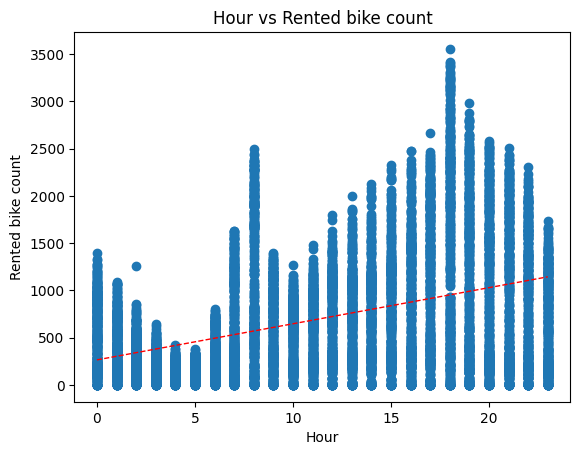

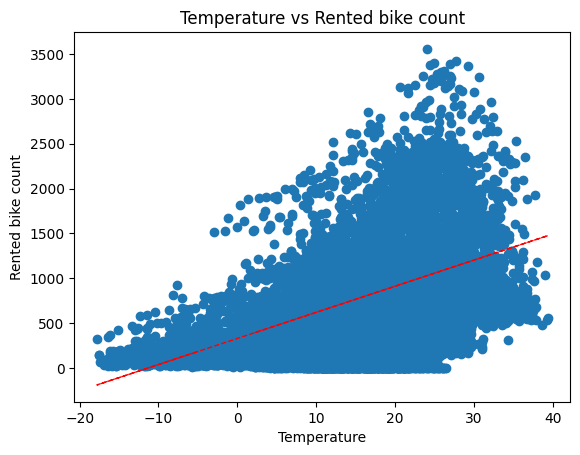

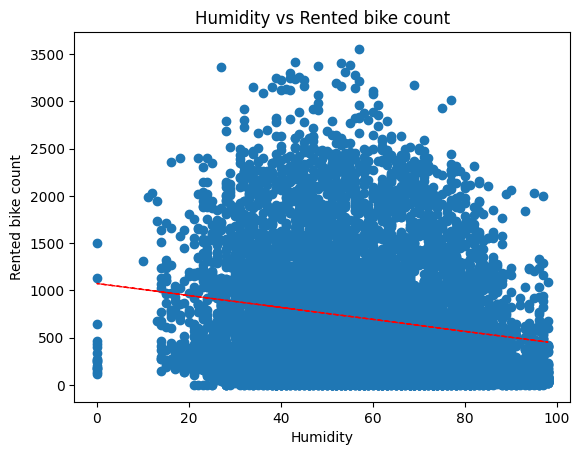

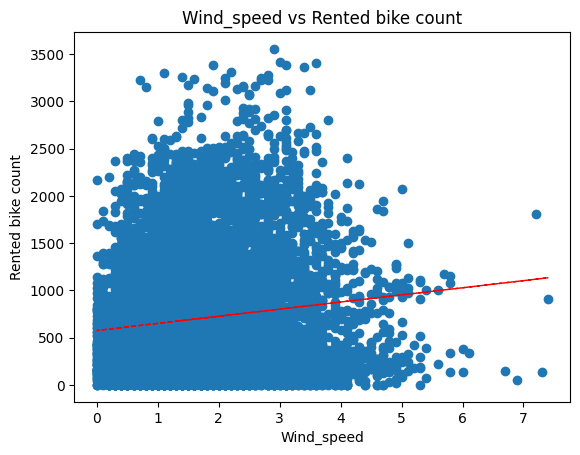

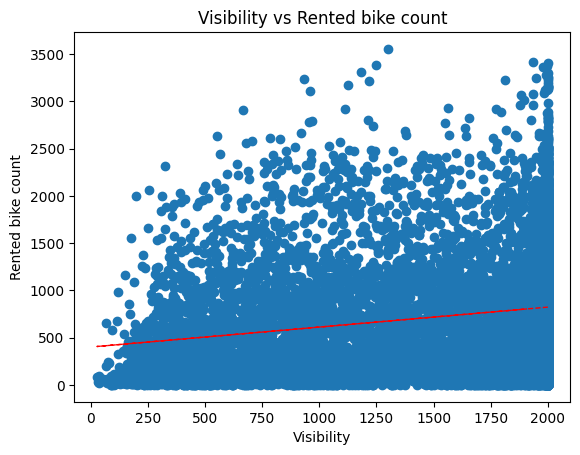

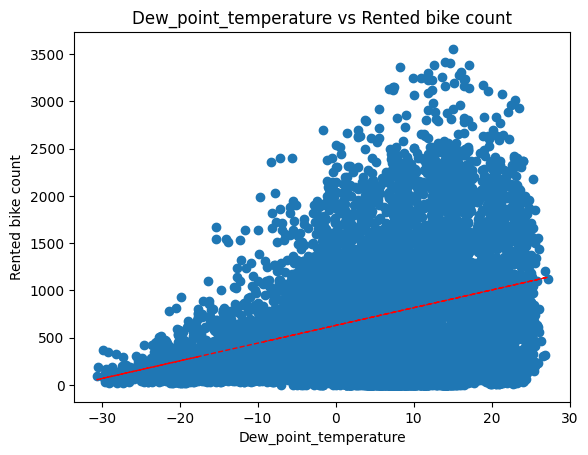

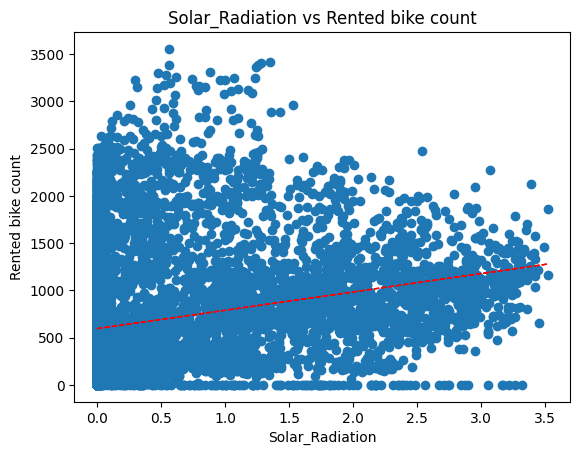

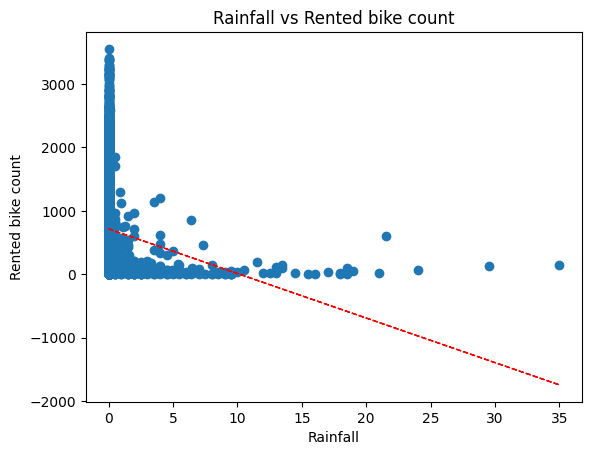

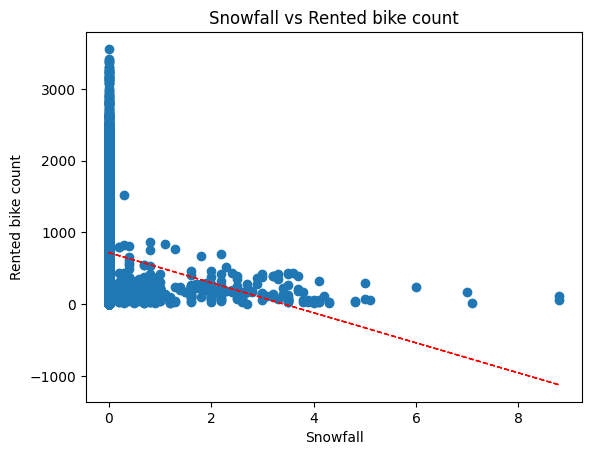

In [ ]:
# Lets check the linear relationship with dependent variable. , alpha=0.5

for feat in numerical_features[1:]:

    # draw scatter plot
    plt.scatter(x = df[feat], y = df['Rented_Bike_Count'])
    plt.xlabel(feat)
    plt.ylabel('Rented bike count')

    # subplot : polyfit line
    z = np.polyfit(df[feat], df['Rented_Bike_Count'], 1)
    y_hat = np.poly1d(z)(df[feat])
    plt.plot(df[feat], y_hat, "r--", lw=1)

    # show plot
    plt.title(feat + ' vs ' + 'Rented bike count')
    plt.show()

#### Analysing outlier

In [ ]:
print(df[df['Snowfall'] > 4]['Snowfall'].count())

17


In [ ]:
df[df['Snowfall'] > 4]

Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
224                  35     8         -0.2        90         1.2         378   
225                  31     9          0.2        90         1.0         305   
226                  19    10          0.5        91         0.4         143   
418                  36    10         -3.7        87         1.0         541   
419                  44    11         -2.9        85         1.2         243   
420                  62    12         -1.8        83         1.2         351   
421                  76    13         -0.9        84         1.2         333   
422                 116    14          0.5        76         0.9         364   
2018                 62     2          0.7        97         1.4         197   
2019                 32     3          0.9        97         1.2         243   
8601                 24     9          0.3        97         3.0          34   
8602                 62    10          0.4        97         1.8         207   
8603                114    11          1.2        97         2.3         975   
8604                167    12          2.5        84         1.9        1538   
8605                241    13          2.6        83         1.9        1774   
8606                298    14          3.0        82         1.7        1589   
8607                330    15          3.7        78         2.0        1314   

      Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
224                    -1.6             0.00       0.0       4.1  Winter   
225                    -1.2             0.00       1.6       4.3  Winter   
226                    -0.8             0.00       0.0       4.3  Winter   
418                    -5.5             0.03       0.0       4.8  Winter   
419                    -5.0             0.06       0.0       4.8  Winter   
420                    -4.3             0.09       1.1       5.1  Winter   
421                    -3.2             0.09       0.0       5.0  Winter   
422                    -3.2             0.17       0.0       4.2  Winter   
2018                    0.2             0.00       0.0       4.1  Winter   
2019                    0.4             0.00       3.7       4.1  Winter   
8601                   -0.1             0.00       9.1       7.1  Autumn   
8602                    0.0             0.00       0.0       8.8  Autumn   
8603                    0.7             0.07       0.0       8.8  Autumn   
8604                    0.0             0.40       1.8       7.0  Autumn   
8605                    0.0             0.84       0.0       6.0  Autumn   
8606                    0.2             0.55       0.0       5.0  Autumn   
8607                    0.2             0.81       0.0       4.1  Autumn   

         Holiday Functioning_Day  Weekday  Month  
224   No Holiday             Yes        6     12  
225   No Holiday             Yes        6     12  
226   No Holiday             Yes        6     12  
418   No Holiday             Yes        0     12  
419   No Holiday             Yes        0     12  
420   No Holiday             Yes        0     12  
421   No Holiday             Yes        0     12  
422   No Holiday             Yes        0     12  
2018  No Holiday             Yes        4      2  
2019  No Holiday             Yes        4      2  
8601  No Holiday             Yes        5     11  
8602  No Holiday             Yes        5     11  
8603  No Holiday             Yes        5     11  
8604  No Holiday             Yes        5     11  
8605  No Holiday             Yes        5     11  
8606  No Holiday             Yes        5     11  
8607  No Holiday             Yes        5     11

In [ ]:
#  'Snowfall (cm)'
df[df['Rainfall'] > 10]['Rainfall'].count()

22

In [ ]:
df[df['Rainfall'] > 10]

Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
2505                 32     9         14.1        98         1.1         253   
3997                151    13         21.8        97         2.4         682   
4012                 51     4         19.2        98         2.4        1965   
4016                152     8         19.7        98         0.5        1958   
4028                 17    20         21.3        97         2.8         388   
4687                 94     7         19.4        97         0.9         272   
4688                187     8         18.9        97         1.2         492   
4708                 72     4         18.0        93         1.6         627   
4979                 11    11         20.4        97         1.4         129   
4981                 24    13         20.5        97         1.2         338   
5034                596    18         20.6        97         0.7         222   
5098                 13    10         21.6        97         0.5         266   
5099                 11    11         21.2        97         1.2         105   
5132                 61    20         23.5        97         0.1        1814   
6498                 96    18         24.3        97         0.8         105   
6500                 10    20         23.3        97         3.3         183   
6501                122    21         22.9        98         2.1        1146   
6524                 19    20         23.4        98         0.6          70   
6641                 23    17         22.7        96         4.9         452   
6642                113    18         21.9        97         1.8         757   
8229                 21    21         14.0        96         4.1         292   
8232                  0     0         12.0        96         3.1        1185   

      Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
2505                   13.7             0.06      17.0       0.0  Spring   
3997                   21.2             0.06      35.0       0.0  Spring   
4012                   18.8             0.00      19.0       0.0  Spring   
4016                   19.3             0.12      13.5       0.0  Spring   
4028                   20.7             0.00      12.5       0.0  Spring   
4687                   18.9             0.00      13.5       0.0  Summer   
4688                   18.4             0.06      11.5       0.0  Summer   
4708                   16.8             0.00      10.5       0.0  Summer   
4979                   19.9             0.09      16.0       0.0  Summer   
4981                   20.0             0.11      14.5       0.0  Summer   
5034                   20.1             0.14      21.5       0.0  Summer   
5098                   21.0             0.13      12.0       0.0  Summer   
5099                   20.6             0.15      18.5       0.0  Summer   
5132                   22.9             0.04      24.0       0.0  Summer   
6498                   23.7             0.01      18.5       0.0  Summer   
6500                   22.7             0.00      15.5       0.0  Summer   
6501                   22.5             0.00      29.5       0.0  Summer   
6524                   23.0             0.00      21.0       0.0  Summer   
6641                   22.0             0.07      13.0       0.0  Autumn   
6642                   21.3             0.02      13.0       0.0  Autumn   
8229                   13.3             0.00      18.0       0.0  Autumn   
8232                   11.3             0.00      18.0       0.0  Autumn   

         Holiday Functioning_Day  Weekday  Month  
2505  No Holiday             Yes        3      3  
3997  No Holiday             Yes        2      5  
4012  No Holiday             Yes        3      5  
4016  No Holiday             Yes        3      5  
4028  No Holiday             Yes        3      5  
4687  No Holiday             Yes        3      6  
4688  No Holiday             Yes        3      6  
4708  No

In [ ]:
df[df['Wind_speed'] > 5]['Wind_speed'].count()

35

In [ ]:
df[df['Wind_speed'] > 5]

Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
85                  391    13          0.0        30         5.4        1938   
87                  341    15         -0.1        25         5.8        2000   
89                  515    17         -1.3        26         5.3        2000   
249                 326     9         -5.9        36         5.1        1941   
253                 241    13         -5.4        32         5.1        1986   
933                 146    21          0.7        77         6.7         692   
974                 177    14         -5.3        37         5.3        2000   
1309                140    13        -12.0        25         6.0        1887   
1409                178    17         -3.8        32         5.2        2000   
1722                216    18         -2.0        15         5.6        2000   
1723                151    19         -3.1        14         5.1        2000   
1724                132    20         -4.4        19         5.8        2000   
1791                295    15          3.7        40         5.3        1950   
2170                191    10          0.1        53         5.3        1022   
2174                375    14          1.2        36         6.0        1430   
2177                423    17          0.4        37         5.2        1366   
3042               1114    18          5.9        43         5.3         859   
3065                908    17          7.6        36         5.3        2000   
3133                967    13         21.9        34         5.1        1861   
3134                913    14         21.2        35         7.4        1992   
3136               1080    16         20.9        34         5.8        2000   
3137               1004    17         20.6        39         5.6        2000   
3138               1805    18         19.7        52         7.2        2000   
3139               1153    19         19.2        55         5.8        2000   
3140                336    20         19.1        58         6.1        2000   
3141                133    21         17.5        70         7.3        1634   
3142                 75    22         15.8        83         5.4         691   
3181               1029    13         18.1        18         5.1        1939   
3712               1501    16         18.6        30         5.1        1891   
4188               1087    12         22.1        36         5.3        1696   
6316                 49     4         25.3        70         6.9         925   
6687               1131    15         28.1        43         5.1        1929   
7916               1003    20         12.2        67         5.4        1956   
7937               1176    17          9.5        34         5.7        2000   
8245                  0    13         14.0        46         5.3         927   

      Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
85                    -15.5             1.17       0.0       0.0  Winter   
87                    -17.8             0.88       0.0       0.0  Winter   
89                    -18.3             0.18       0.0       0.0  Winter   
249                   -18.6             0.10       0.0       0.0  Winter   
253                   -19.5             1.24       0.0       0.0  Winter   
933                    -2.8             0.00       0.9       1.0  Winter   
974                   -17.7             1.05       0.0       0.3  Winter   
1309                  -28.0             1.27       0.0       0.9  Winter   
1409                  -18.1             0.25       0.0       0.0  Winter   
1722                  -25.2             0.13       0.0       0.0  Winter   
1723                  -26.9             0.00       0.0       0.0  Winter   
1724                  -24.6             0.00       0.0       0.0  Winter   
1791                   -8.6             1.96       0.0       0.0  Winter   
2170                   -8.3             1.12       0.0       

In [ ]:
df = df.drop(df[df['Snowfall'] > 4].index, axis=0)
df = df.drop(df[df['Rainfall'] > 10].index, axis=0)
df = df.drop(df[df['Wind_speed'] > 5].index, axis=0)

##### 1. Why did you pick the specific chart?

- To check the linear relationship between feature and  Rented bike count.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

##### replot after removing outlier

In [ ]:
# for feat in numerical_features:

#     # Create a 2x2 grid of subplots
#     fig, axs = plt.subplots(1, 3, figsize=(16, 5))

#     # Subplot 1: Histogram
#     sns.histplot(df[feat], kde = True, ax=axs[0])
#     axs[0].axvline(df[feat].mean(), color ="green", alpha = 0.8, lw = 1.5, linestyle='dashed', label = 'Mean')
#     axs[0].axvline(df[feat].median(), color ="red", alpha = 0.8, lw = 1.5, linestyle='dashed', label = 'Median')
#     axs[0].legend()

#     # Subplot 2: Boxplot
#     sns.boxplot(df[feat], ax=axs[1])
#     plt.title(feat)

#     # Subplot 3: Scatter plot
#     axs[2].scatter(x = df[feat], y = df['Rented_Bike_Count'])
#     # axs[2].xlabel(feat)
#     # axs[2].ylabel('Rented bike count')

#     # subplot : polyfit line
#     z = np.polyfit(df[feat], df['Rented_Bike_Count'], 1)
#     y_hat = np.poly1d(z)(df[feat])
#     axs[2].plot(df[feat], y_hat, "r--", lw=1)

#     # show plot
#     axs[2].set_title(feat + ' vs ' + 'Rented bike count')
#     # Show the plot
#     plt.show()

### **Categorical features Analysis**

---



In [82]:
# seprating categorical features
categorical_features = set(df.columns) - set(numerical_features)
categorical_features

{'Functioning_Day', 'Holiday', 'Hour', 'Month', 'Seasons', 'Weekday'}

In [ ]:
# function to plot barplot and boxplot
def categorical_plot(feat):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    sns.barplot(x = df[feat], y = df['Rented_Bike_Count'], ax =axs[0])
    axs[0].set_title(f'{feat} vs Rented Bike Count')

    sns.boxplot(x = df[feat], y = df['Rented_Bike_Count'], ax = axs[1])
    axs[1].set_title(f'{feat} vs Rented Bike Count')

    plt.show()


#### **Column: Functioning day**

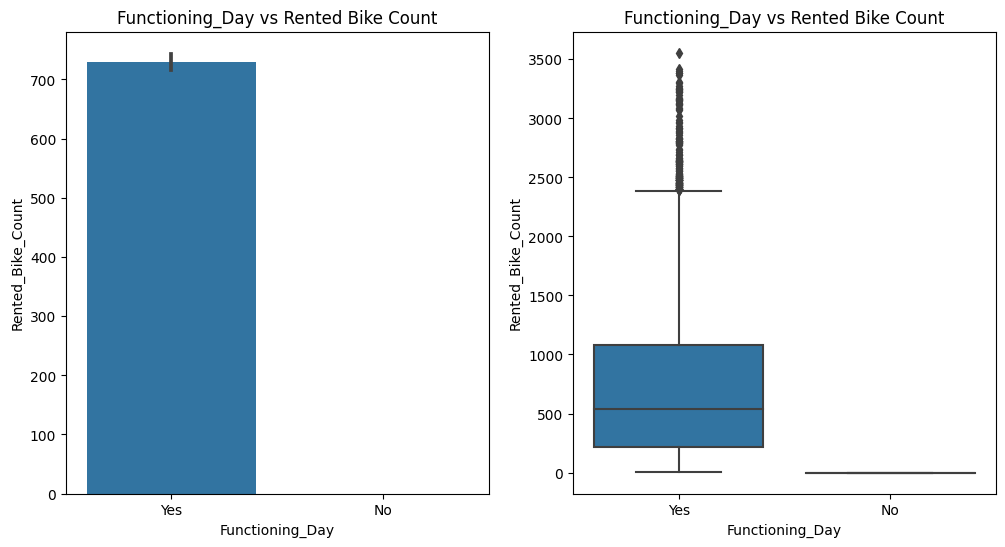

In [ ]:
categorical_plot('Functioning_Day')

Why did you pick the specific chart?

Answer Here.

What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Column: Holiday**

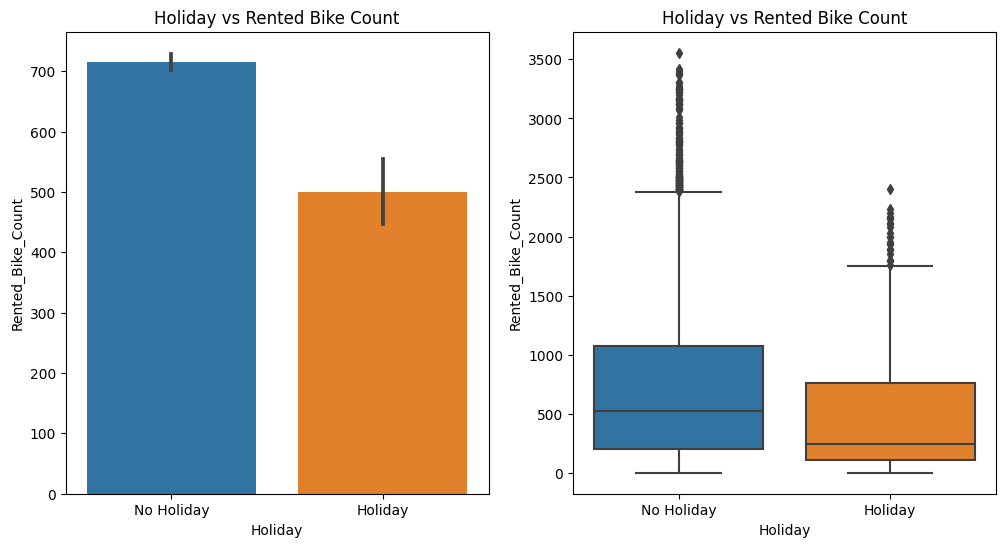

In [ ]:
categorical_plot('Holiday')

Why did you pick the specific chart?

Answer Here.

What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Column: Month**

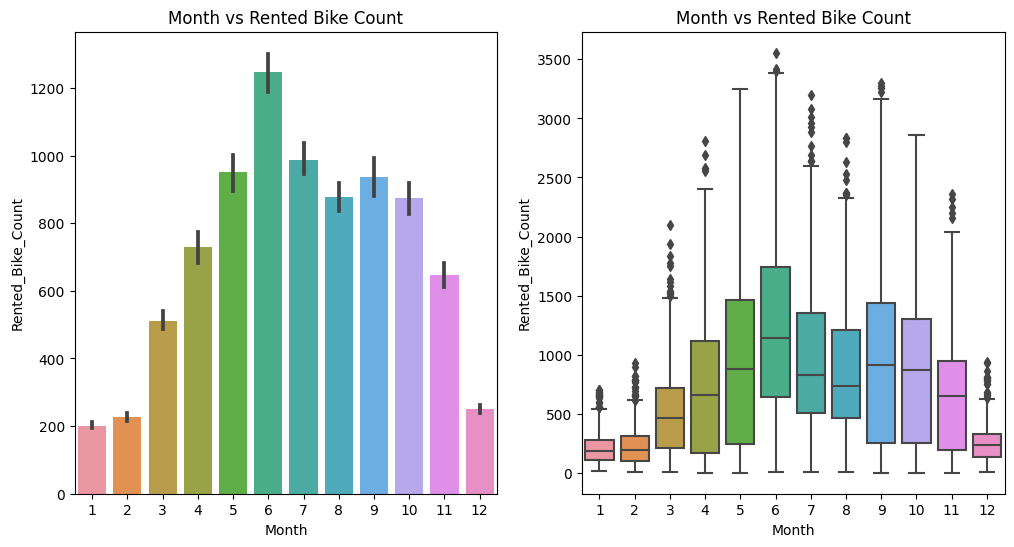

In [ ]:
categorical_plot('Month')

Why did you pick the specific chart?

Answer Here.

What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Column: Seasons**

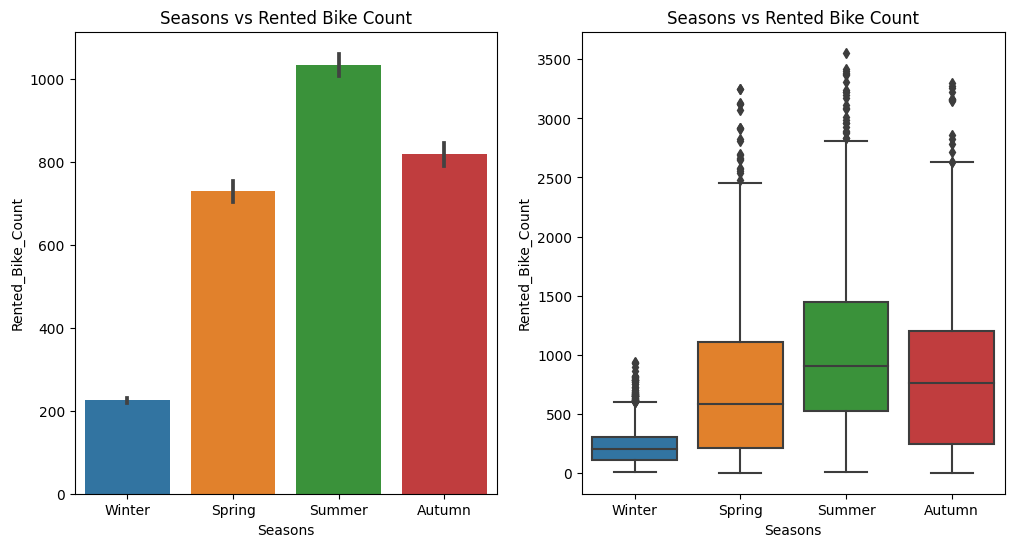

In [ ]:
categorical_plot('Seasons')

Why did you pick the specific chart?

Answer Here.

What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Column: Weekday**

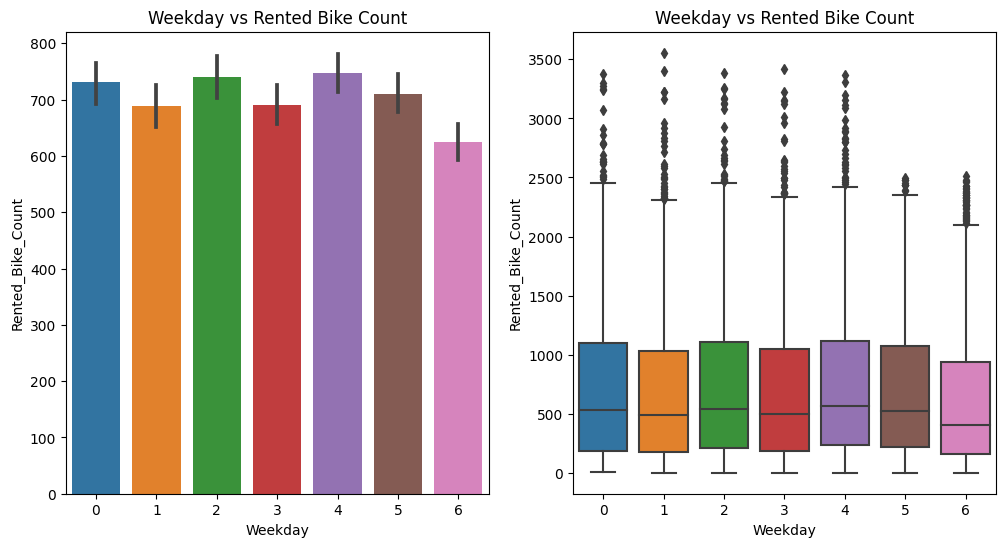

In [ ]:
categorical_plot('Weekday')

Why did you pick the specific chart?

Answer Here.

What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Column: Hour**

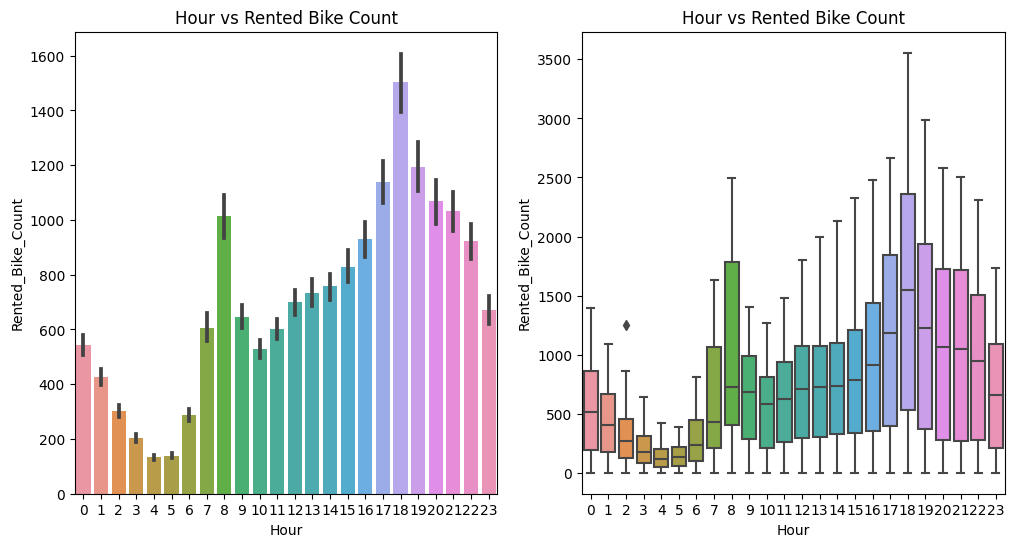

In [ ]:
categorical_plot('Hour')

Why did you pick the specific chart?

Answer Here.

What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Scatter plot wrt dependent var to check colinear relation.**

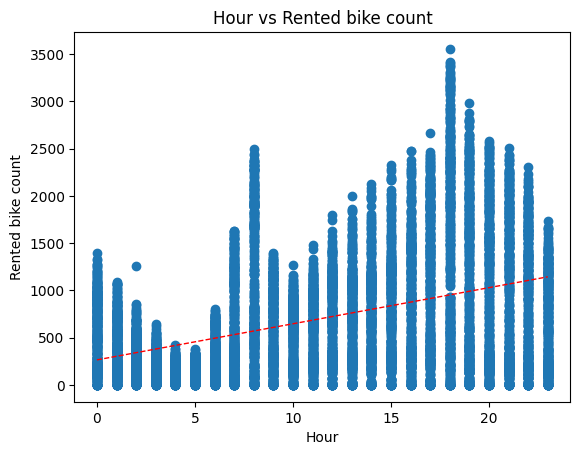

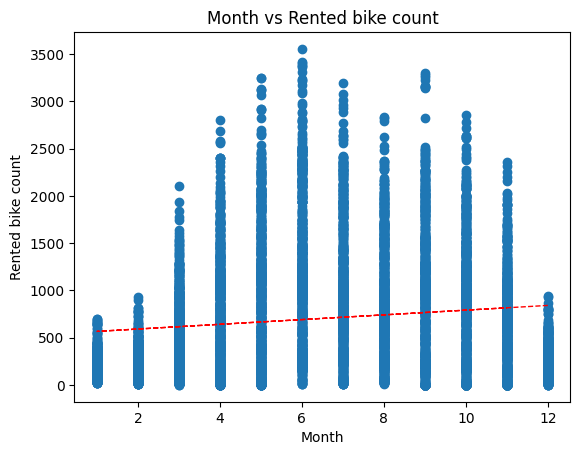

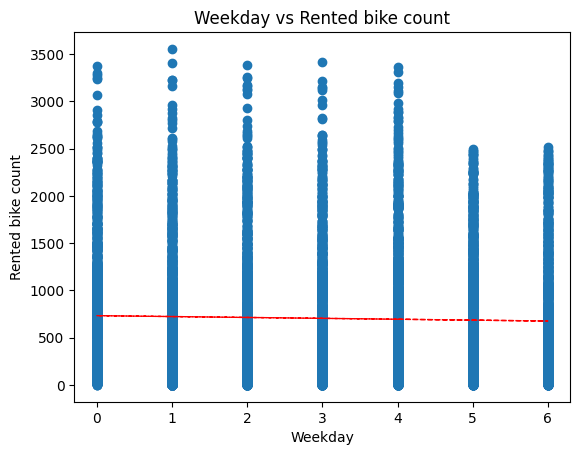

In [84]:
# Chart - 6 visualization code
columns = {'Hour', 'Month', 'Weekday'}
for feat in columns:

    # draw scatter plot
    plt.scatter(x = df[feat], y = df['Rented_Bike_Count'])
    plt.xlabel(feat)
    plt.ylabel('Rented bike count')

    # subplot : polyfit line
    z = np.polyfit(df[feat], df['Rented_Bike_Count'], 1)
    y_hat = np.poly1d(z)(df[feat])
    plt.plot(df[feat], y_hat, "r--", lw=1)

    # show plot
    plt.title(feat + ' vs ' + 'Rented bike count')
    plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Correlation Heatmap**

<ipython-input-34-6c841a889961>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

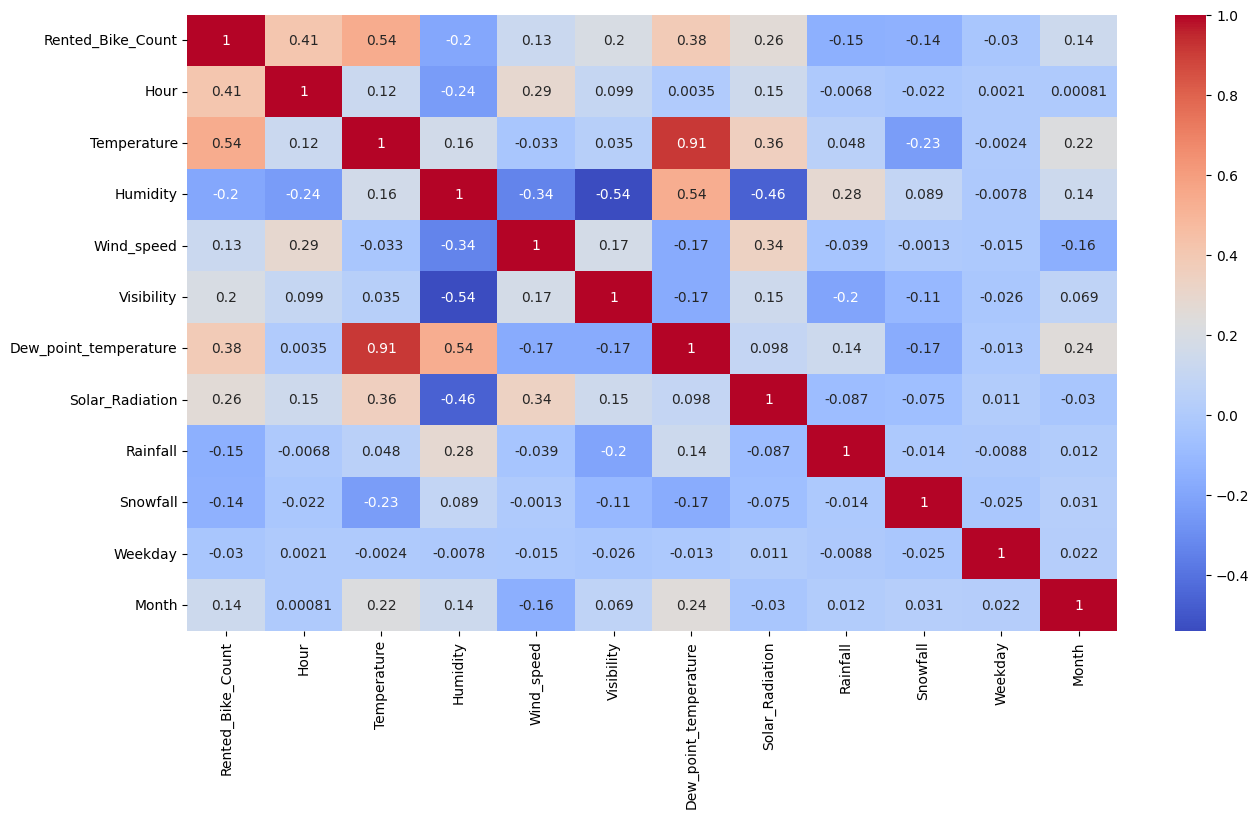

In [ ]:
# Correlation Heatmap visualization code
## Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

- This plot is pick to find the correlation of different features with Rented bike count and features with each other.

##### 2. What is/are the insight(s) found from the chart?

- Rented bike count has more correlation with Hour and Temperature.
- Weekday has no correlation with bike count so we can drop it.
- Temperature is highly correlated with Dew point temperature.

#### **Pair Plot**

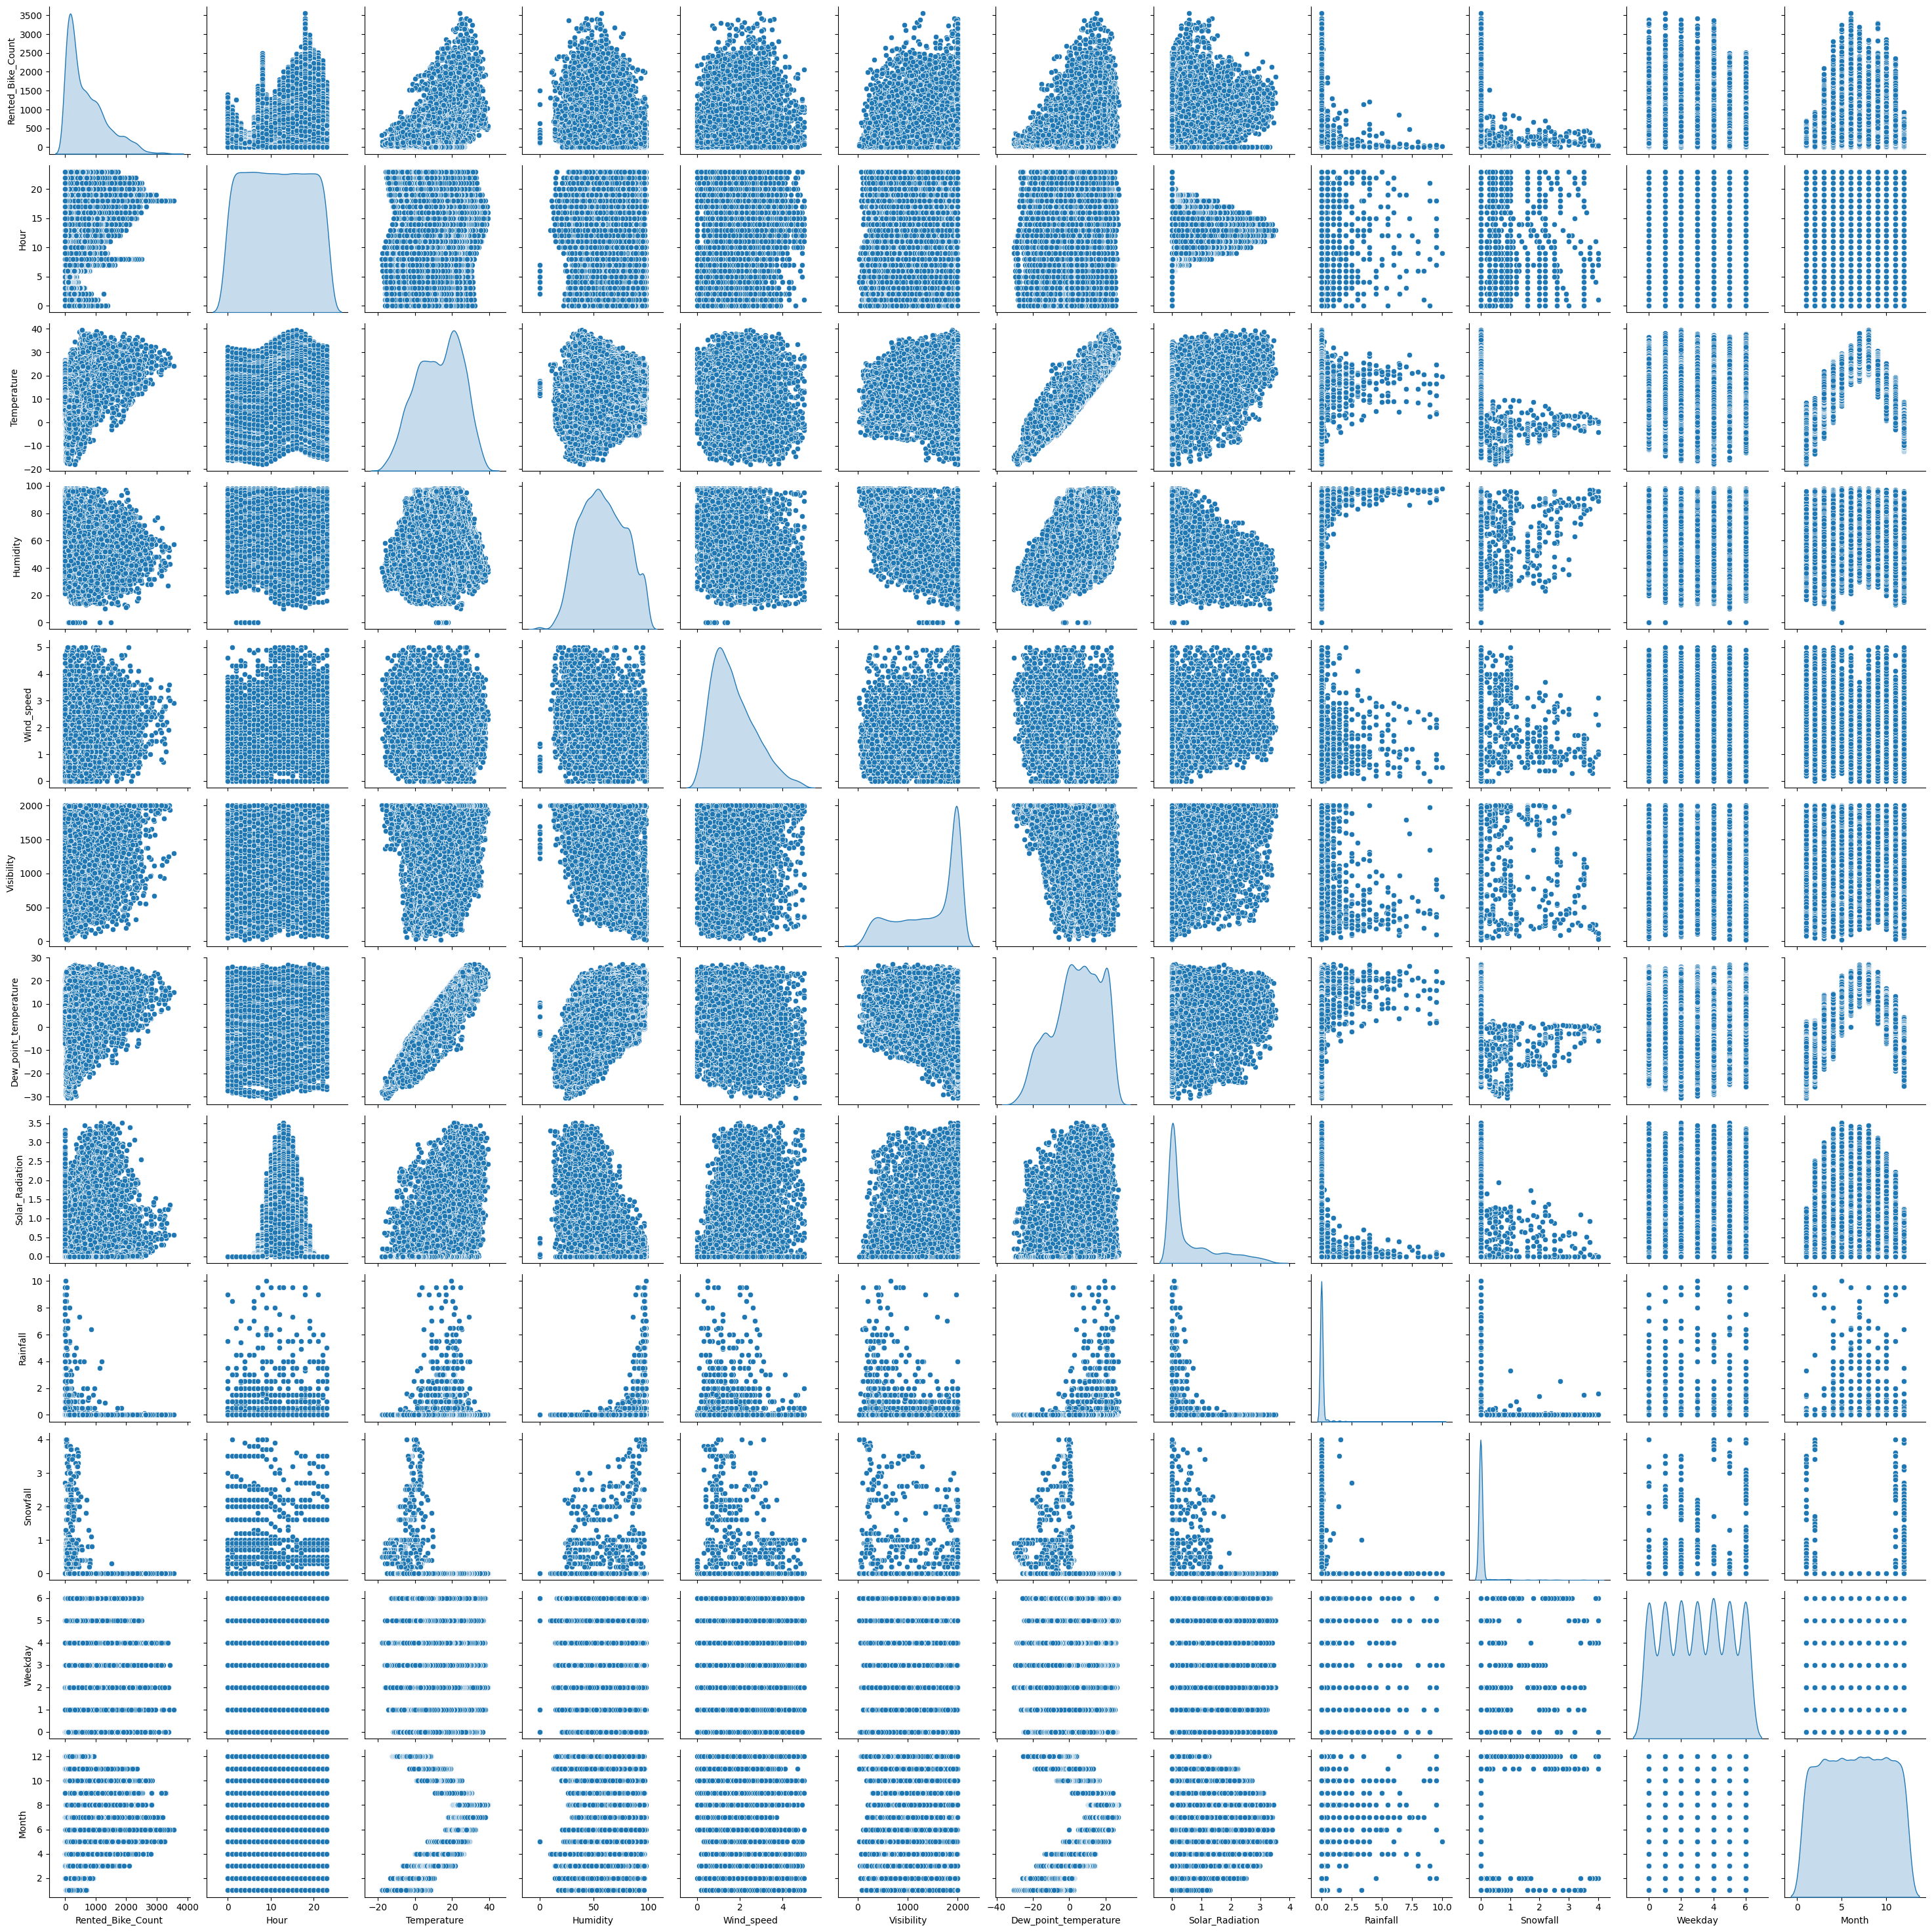

In [ ]:
# Pair Plot visualization code
sns.pairplot(df, diag_kind='kde')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

#### 1. Handling Missing Values

- No missing values




In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
Weekday                  0
Month                    0
dtype: int64

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

There are few columns which are of categorical type and needs to do encoding.

1. Handle Functioning day
2. Handle Holiday
3. Handlie Seasons

In [ ]:
# 1. Seasons
# df['Seasons'].unique()
# season_dict = {'Winter': 1, 'Spring':2, 'Summer' : 3, 'Autumn':4}

# df['Seasons'] = df['Seasons'].map(season_dict)
# df.head().T

In [ ]:
# one hot encoding of seasons
one_hot_encoded = pd.get_dummies(df['Seasons'])
df = pd.concat([df, one_hot_encoded], axis=1)

In [ ]:
df = df.drop('Seasons', axis = 1)

In [ ]:
conv_binary = {'Yes': 1, 'No': 0}
df['Functioning_Day'] = df['Functioning_Day'].map(conv_binary)

In [ ]:
# 3 encoding holiday column
df['Holiday'].unique()
conv_binary = {'Holiday': 1, 'No Holiday': 0}
df['Holiday'] = df['Holiday'].map(conv_binary)

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

#### **Calcualte VIF**

In [ ]:
df.T


0       1       2       3       4       5       6     \
Rented_Bike_Count       254.0   204.0   173.0   107.0    78.0   100.0   181.0   
Hour                      0.0     1.0     2.0     3.0     4.0     5.0     6.0   
Temperature              -5.2    -5.5    -6.0    -6.2    -6.0    -6.4    -6.6   
Humidity                 37.0    38.0    39.0    40.0    36.0    37.0    35.0   
Wind_speed                2.2     0.8     1.0     0.9     2.3     1.5     1.3   
Visibility             2000.0  2000.0  2000.0  2000.0  2000.0  2000.0  2000.0   
Dew_point_temperature   -17.6   -17.6   -17.7   -17.6   -18.6   -18.7   -19.5   
Solar_Radiation           0.0     0.0     0.0     0.0     0.0     0.0     0.0   
Rainfall                  0.0     0.0     0.0     0.0     0.0     0.0     0.0   
Snowfall                  0.0     0.0     0.0     0.0     0.0     0.0     0.0   
Holiday                   0.0     0.0     0.0     0.0     0.0     0.0     0.0   
Functioning_Day           1.0     1.0     1.0     1.0     1.0     1.0     1.0   
Weekday                   4.0     4.0     4.0     4.0     4.0     4.0     4.0   
Month                    12.0    12.0    12.0    12.0    12.0    12.0    12.0   
Autumn                    0.0     0.0     0.0     0.0     0.0     0.0     0.0   
Spring                    0.0     0.0     0.0     0.0     0.0     0.0     0.0   
Summer                    0.0     0.0     0.0     0.0     0.0     0.0     0.0   
Winter                    1.0     1.0     1.0     1.0     1.0     1.0     1.0   

                         7        8        9     ...     8750     8751  \
Rented_Bike_Count       460.0   930.00   490.00  ...   761.00   768.00   
Hour                      7.0     8.00     9.00  ...    14.00    15.00   
Temperature              -7.4    -7.60    -6.50  ...     7.80     7.00   
Humidity                 38.0    37.00    27.00  ...    20.00    20.00   
Wind_speed                0.9     1.10     0.50  ...     2.20     3.30   
Visibility             2000.0  2000.00  1928.00  ...  2000.00  1994.00   
Dew_point_temperature   -19.3   -19.80   -22.40  ...   -13.80   -14.40   
Solar_Radiation           0.0     0.01     0.23  ...     1.67     1.21   
Rainfall                  0.0     0.00     0.00  ...     0.00     0.00   
Snowfall                  0.0     0.00     0.00  ...     0.00     0.00   
Holiday                   0.0     0.00     0.00  ...     0.00     0.00   
Functioning_Day           1.0     1.00     1.00  ...     1.00     1.00   
Weekday                   4.0     4.00     4.00  ...     4.00     4.00   
Month                    12.0    12.00    12.00  ...    11.00    11.00   
Autumn                    0.0     0.00     0.00  ...     1.00     1.00   
Spring                    0.0     0.00     0.00  ...     0.00     0.00   
Summer                    0.0     0.00     0.00  ...     0.00     0.00   
Winter                    1.0     1.00     1.00  ...     0.00     0.00   

                          8752     8753    8754    8755    8756    8757  \
Rented_Bike_Count       837.00  1047.00  1384.0  1003.0   764.0   694.0   
Hour                     16.00    17.00    18.0    19.0    20.0    21.0   
Temperature               7.20     6.00     4.7     4.2     3.4     2.6   
Humidity                 23.00    29.00    34.0    34.0    37.0    39.0   
Wind_speed                1.50     2.10     1.9     2.6     2.3     0.3   
Visibility             1945.00  1877.00  1661.0  1894.0  2000.0  1968.0   
Dew_point_temperature   -12.60   -10.70    -9.8   -10.3    -9.9    -9.9   
Solar_Radiation           0.72     0.23     0.0     0.0     0.0     0.0   
Rainfall                  0.00     0.00     0.0     0.0     0.0     0.0   
Snowfall                  0.00     0.00     0.0     0.0     0.0     0.0   
Holiday                   0.00     0.00     0.0     0.0     0.0     0.0   
Functioning_Day           1.00     1.00     1.0     1.0     1.0     1.0   
Weekday                   4.00     4.00     4.0     4.0     4.0     4.0   
Month                    11.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(dataframe):
    """
    Calculate the Variance Inflation Factor (VIF) for each independent variable in a DataFrame.

    Parameters:
    dataframe (pd.DataFrame): The DataFrame containing the independent variables.

    Returns:
    vif_df (pd.DataFrame): A DataFrame with variables as rows and their corresponding VIF values as columns.
    """
    vif_data = pd.DataFrame()
    vif_data["Variable"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]

    return vif_data

# Example usage:
if __name__ == "__main__":
    # Load your dataset into a DataFrame
    # For example, assume 'df' is your DataFrame with independent variables
    vif_result = calculate_vif(df)
    print(vif_result)


                 Variable         VIF
0       Rented_Bike_Count    2.256627
1                    Hour    1.411025
2             Temperature   91.245809
3                Humidity   20.960978
4              Wind_speed    1.313882
5              Visibility    1.682797
6   Dew_point_temperature  118.917197
7         Solar_Radiation    2.067841
8                Rainfall    1.156793
9                Snowfall    1.139666
10                Holiday    1.034878
11        Functioning_Day    1.237697
12                Weekday    1.016733
13                  Month    1.837373
14                 Autumn  112.527817
15                 Spring  111.856582
16                 Summer  116.545137
17                 Winter  107.447530


In [ ]:
df = df.drop('Dew_point_temperature', axis = 1)

In [ ]:
# Example usage:
if __name__ == "__main__":
    # Load your dataset into a DataFrame
    # For example, assume 'df' is your DataFrame with independent variables
    vif_result = calculate_vif(df)
    print(vif_result)

             Variable        VIF
0   Rented_Bike_Count   2.255973
1                Hour   1.409248
2         Temperature   5.619294
3            Humidity   2.783049
4          Wind_speed   1.311957
5          Visibility   1.678454
6     Solar_Radiation   1.981326
7            Rainfall   1.134969
8            Snowfall   1.134291
9             Holiday   1.034849
10    Functioning_Day   1.236479
11            Weekday   1.009860
12              Month   1.837205
13             Autumn  28.581767
14             Spring  26.161195
15             Summer  34.563019
16             Winter  24.173354


#### 1. Feature Manipulation
Remove the week column

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
df.drop('Weekday', axis = 1, inplace = True)
# df.drop('Seasons', axis = 1, inplace = True)
df.head().T

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

**Transformation**

---
Below are the some type of method or way to deal above type of problem.

**square-root for moderate skew:** sqrt(x) for positively skewed data, sqrt(max(x+1) - x) for negatively skewed data

**log for greater skew:** log10(x) for positively skewed data, log10(max(x+1) - x) for negatively skewed data

**inverse for severe skew:** 1/x for positively skewed data 1/(max(x+1) - x) for negatively skewed data

**Linearity and heteroscedasticity:** First try log transformation in a situation where the dependent variable starts to increase more rapidly with increasing independent variable values If your data does the opposite – dependent variable values decrease more rapidly with increasing independent variable values – you can first consider a square transformation.

In [89]:
def draw_plot(y):

    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    fig.subplots_adjust(hspace=0.4)
    # Subplot 1: Histogram
    sns.histplot(y, kde = True, ax=axs[0])
    axs[0].axvline(y.mean(), color ="green", alpha = 0.8, lw = 1.5, linestyle='dashed', label = 'Mean')
    axs[0].axvline(y.median(), color ="red", alpha = 0.8, lw = 1.5, linestyle='dashed', label = 'Median')
    axs[0].legend()

    # Subplot 2: Boxplot
    sns.boxplot(y, ax=axs[1])
    axs[1].set_title('boxplot')

    #Subplot 3: Q-Q plot
    stats.probplot(y, plot = axs[2], dist="norm")
    axs[2].set_title('Q-Q Plot')

    # Show the plot
    plt.show()

In [86]:
def test_transformation(feat):
    # plot 1 Withoutransformation
    y = df[feat]
    draw_plot(y)

    # plot 2 with log transformation
    print('log transformation')
    y = np.log10(df[feat])
    draw_plot(y)

    # plot 3 with squareroot transformation
    print('Square root transformation')
    y = np.sqrt(df[feat])
    draw_plot(y)

    # plot 4 with inversent transformation
    print('Inverse transformation')
    y = 1/(df[feat])
    draw_plot(y)

#### **Rented bike count**

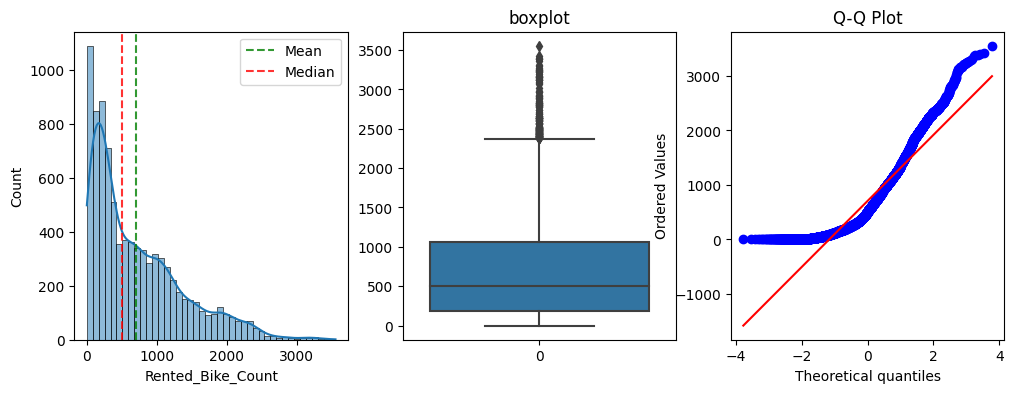

log transformation


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2698: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


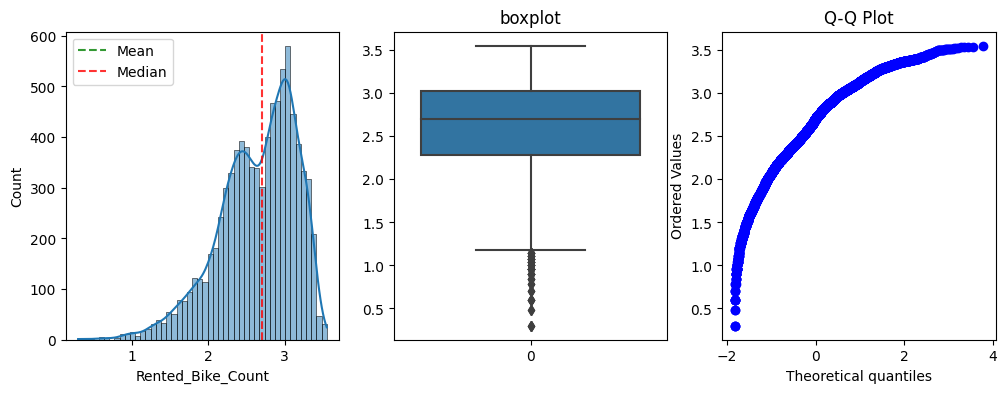

Square root transformation


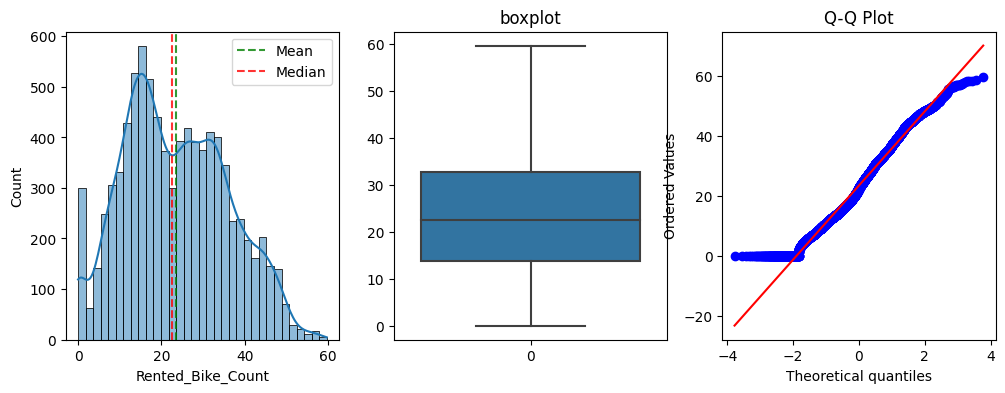

Inverse transformation


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2698: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


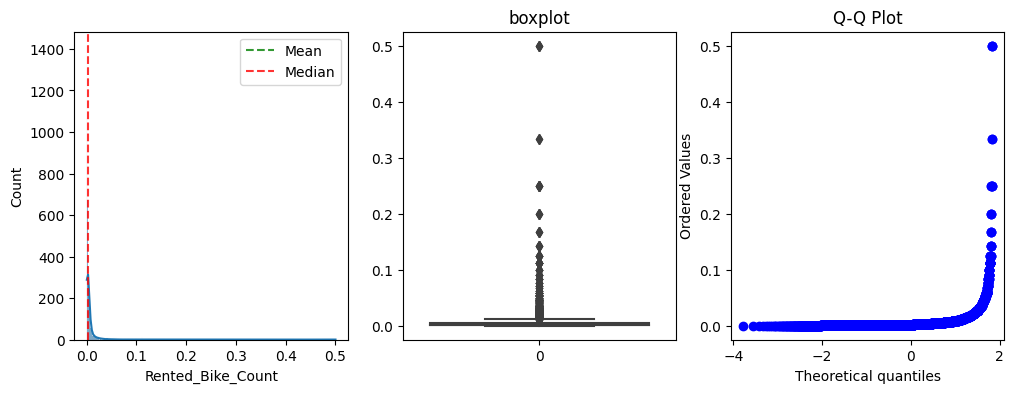

In [90]:
feat = 'Rented_Bike_Count'
test_transformation(feat)

#### **Temperature**

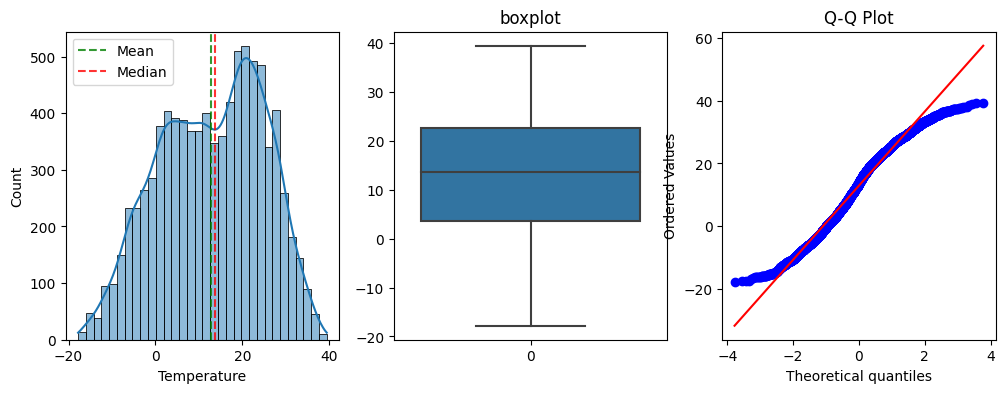

log transformation


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


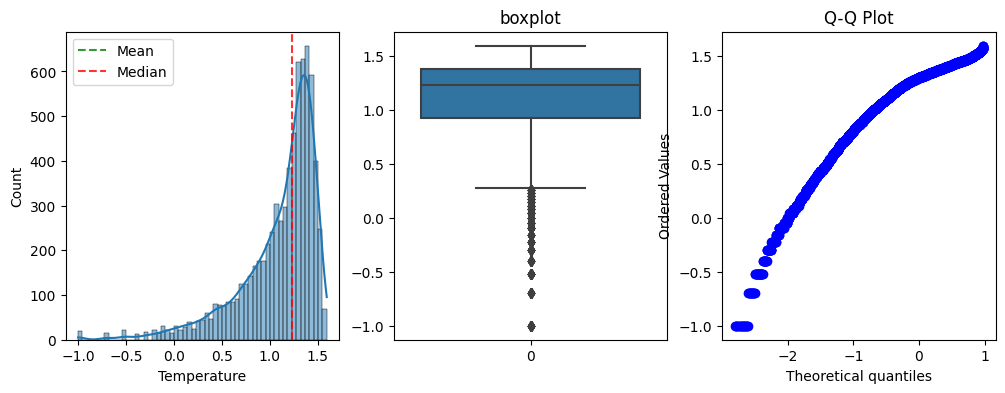

Square root transformation


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


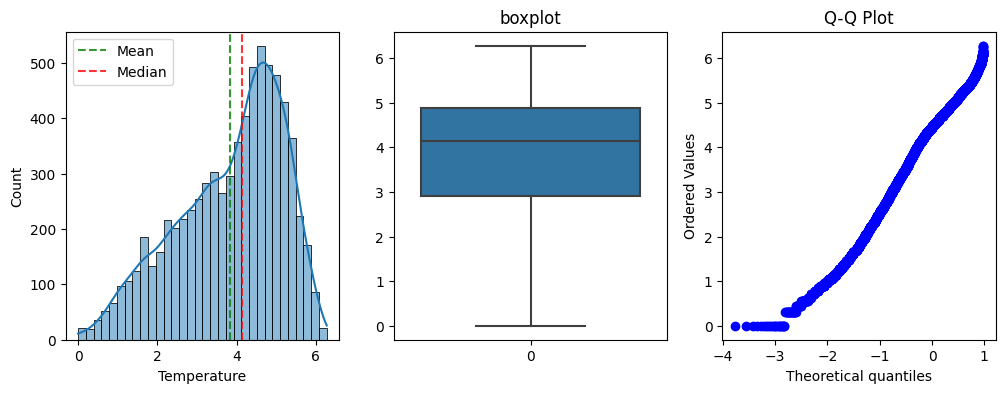

Inverse transformation


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2698: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


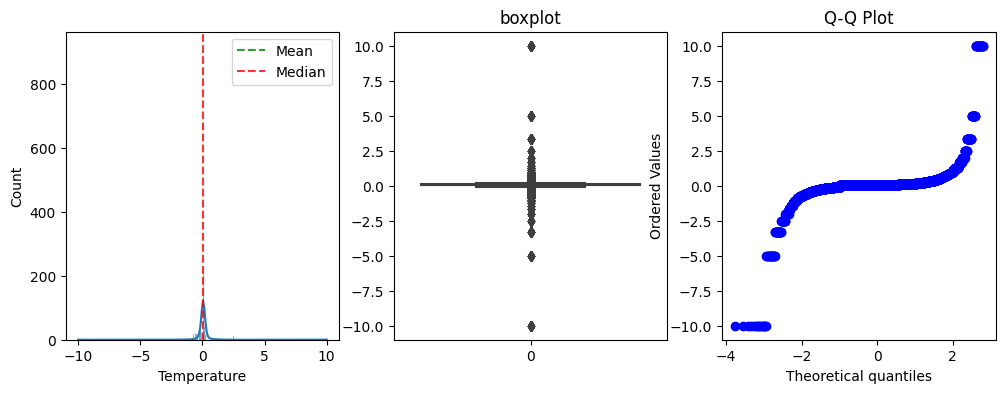

In [91]:
feat = 'Temperature'
test_transformation(feat)

#### **Humidity**

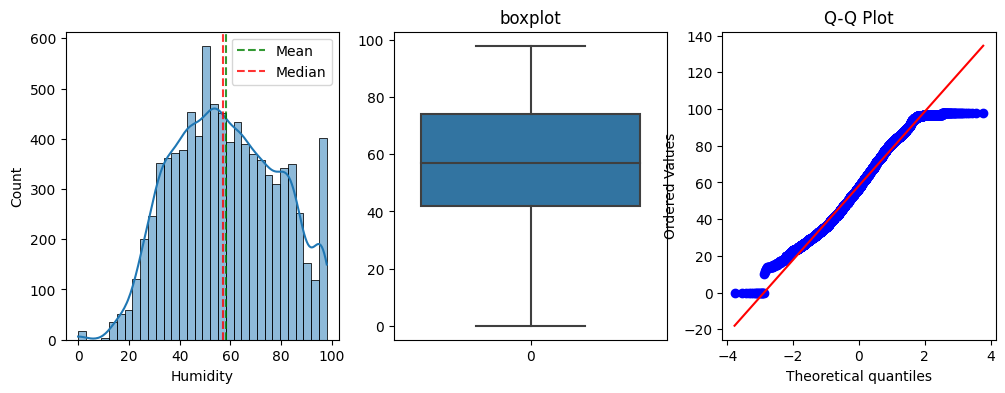

log transformation


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2698: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


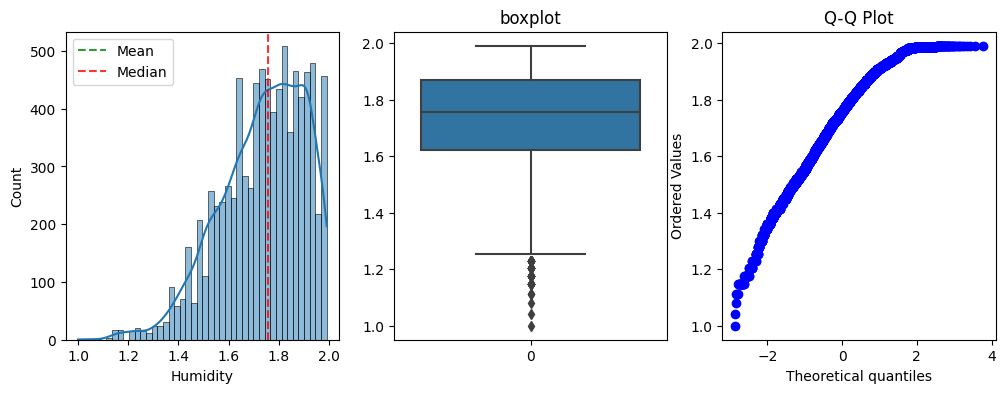

Square root transformation


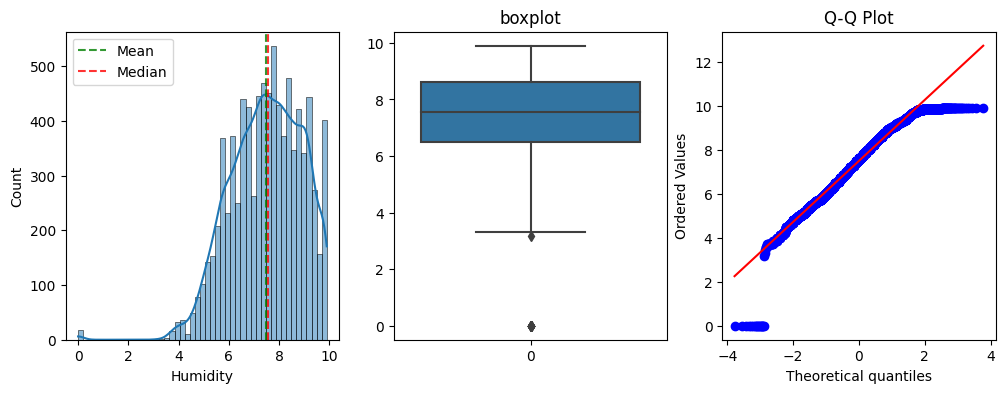

Inverse transformation


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2698: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


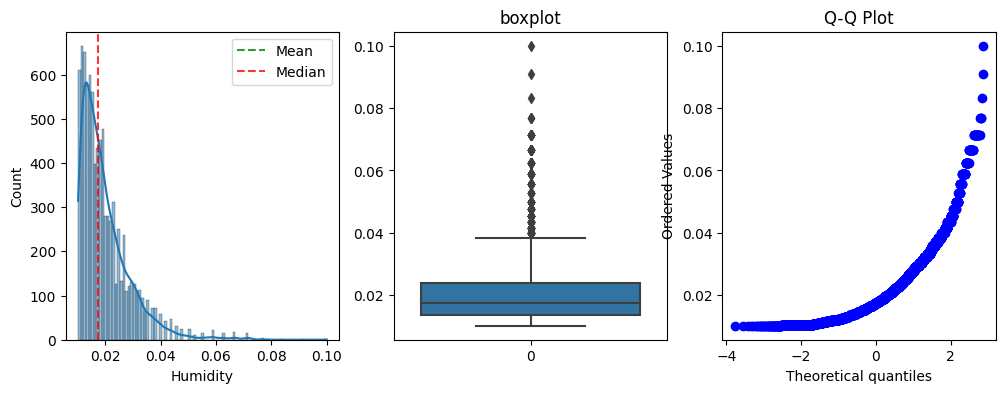

In [92]:
feat = 'Humidity'
test_transformation(feat)

#### **Wind speed**

In [93]:
feat = 'Wind_speed'

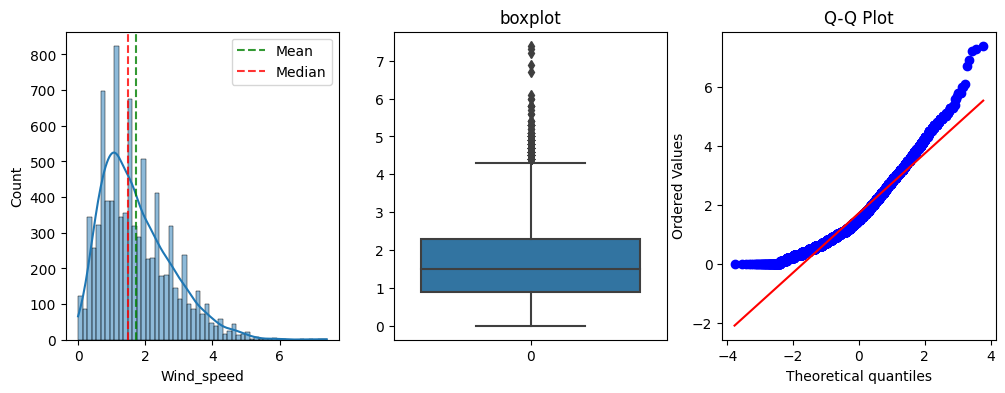

In [94]:
y = df[feat]
draw_plot(y)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2698: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


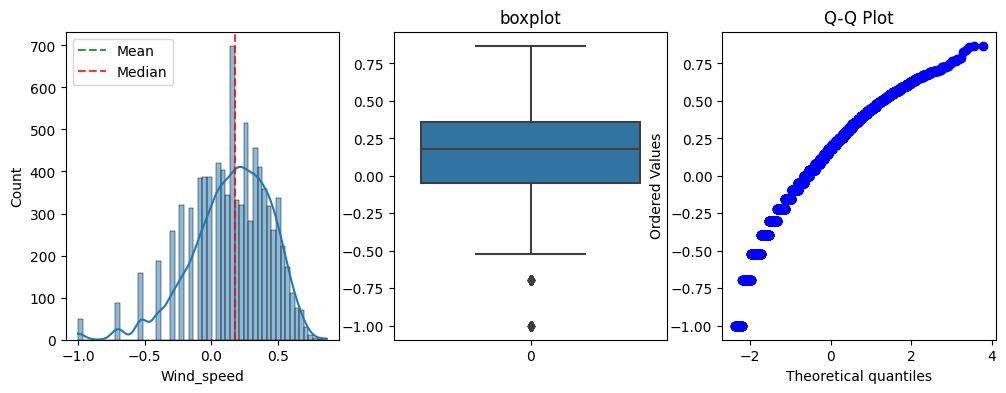

In [95]:

y = np.log10(df[feat])
draw_plot(y)

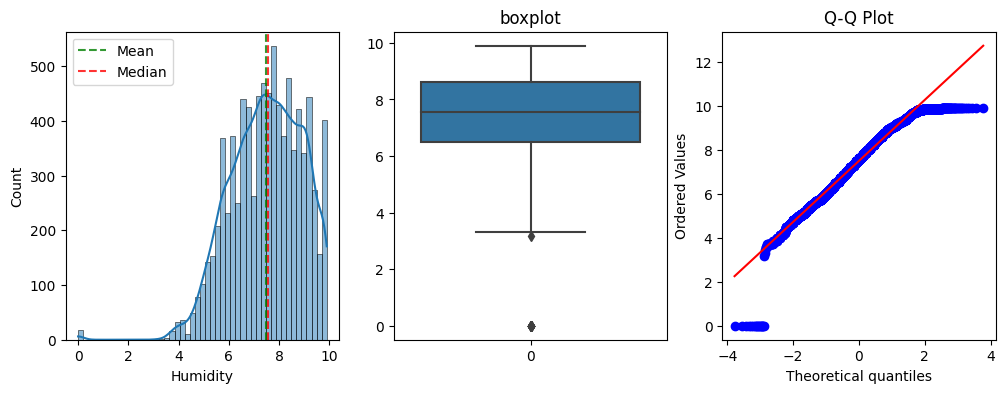

In [97]:
feat = 'Humidity'
y = np.sqrt(df[feat])
draw_plot(y)

#### **Solar_Radiation**



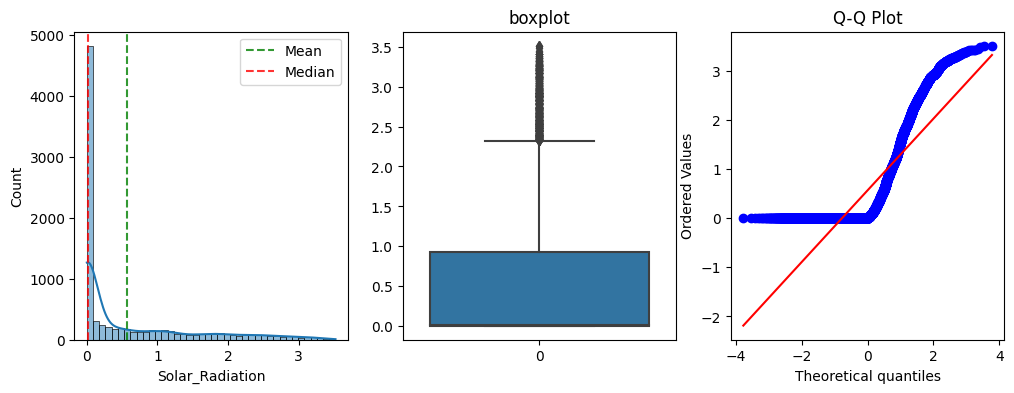

log transformation


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2698: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


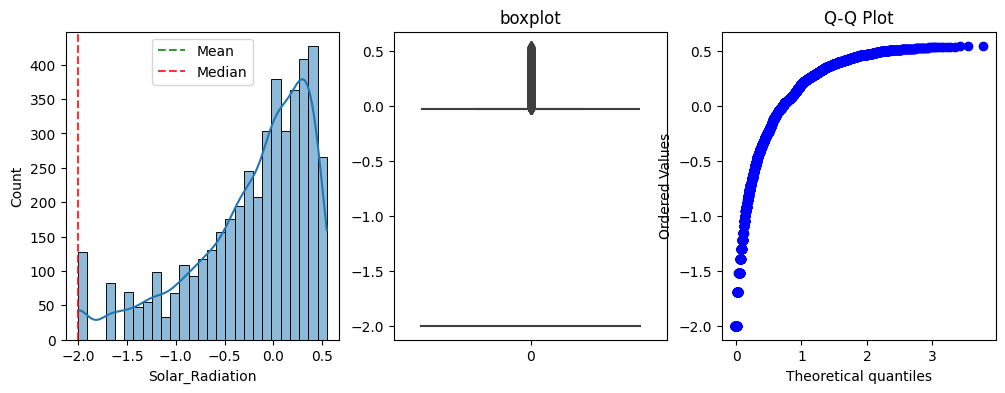

Square root transformation


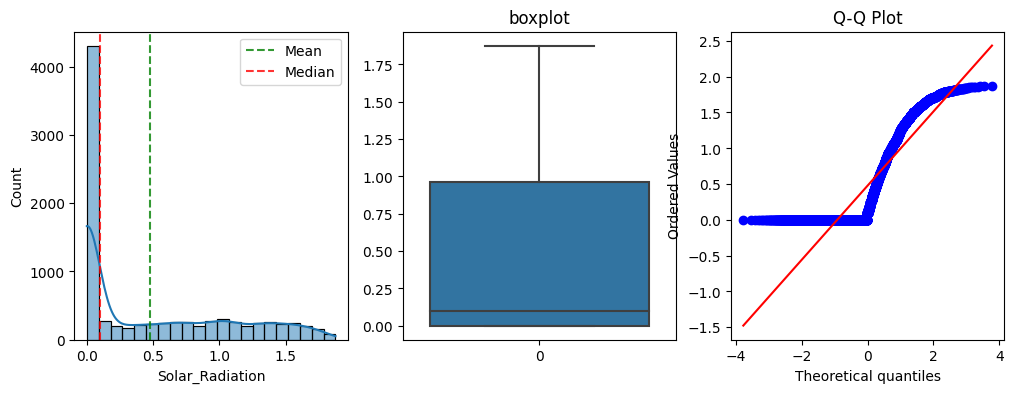

Inverse transformation


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2698: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


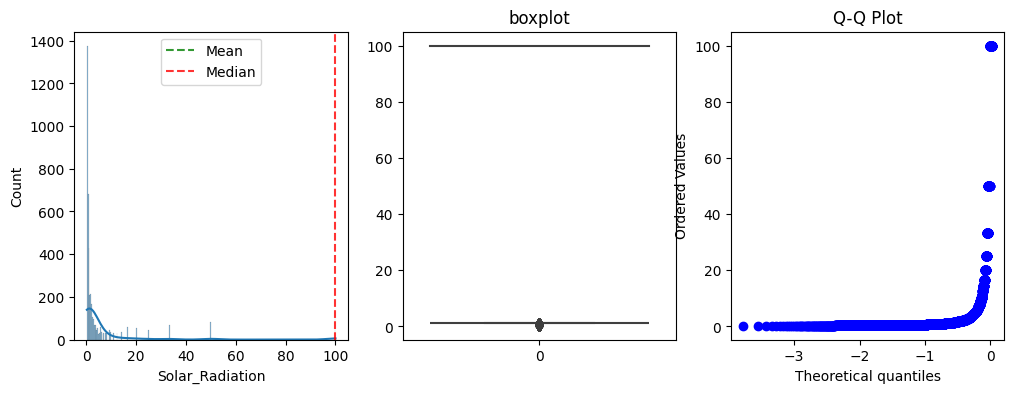

In [98]:
# 'Solar_Radiation', 'Rainfall', 'Snowfall'
feat = 'Solar_Radiation'
test_transformation(feat)

#### **Rainfall**

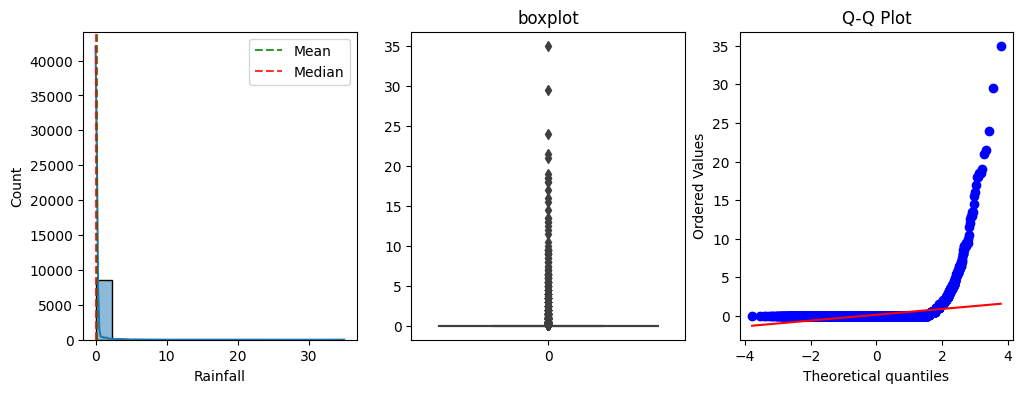

log transformation


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2698: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


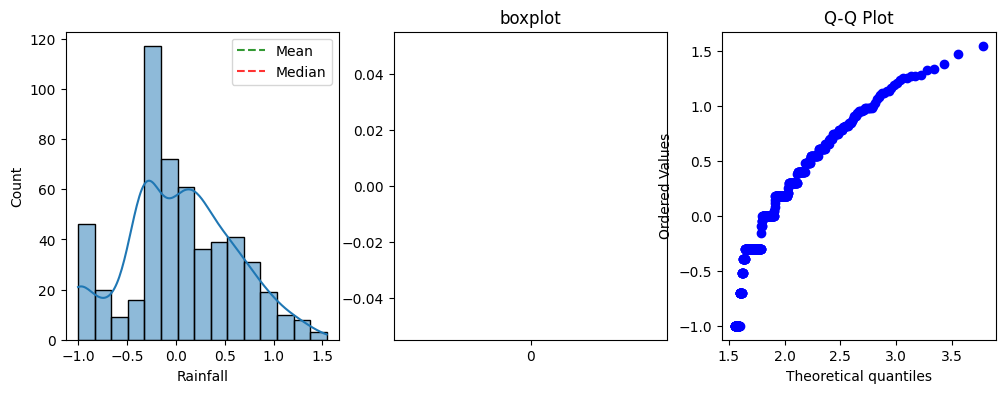

Square root transformation


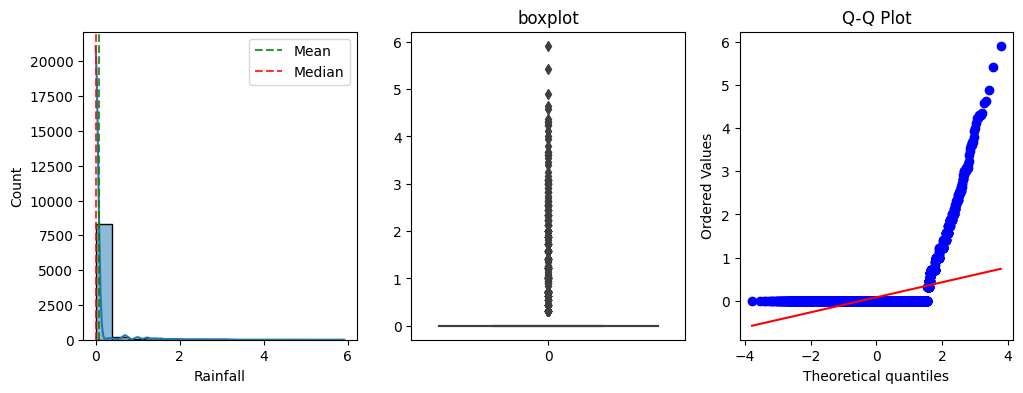

Inverse transformation


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2698: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


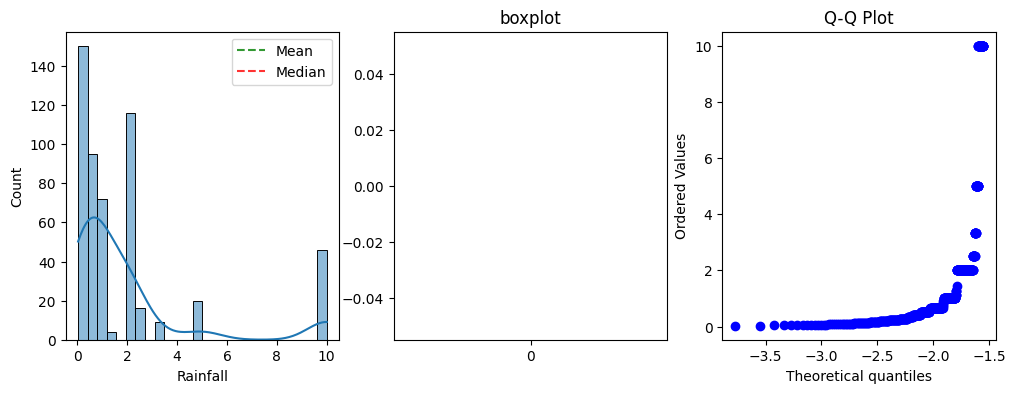

In [99]:
# 'Solar_Radiation', 'Rainfall', 'Snowfall'
feat = 'Rainfall'
test_transformation(feat)

#### **Snowfall**

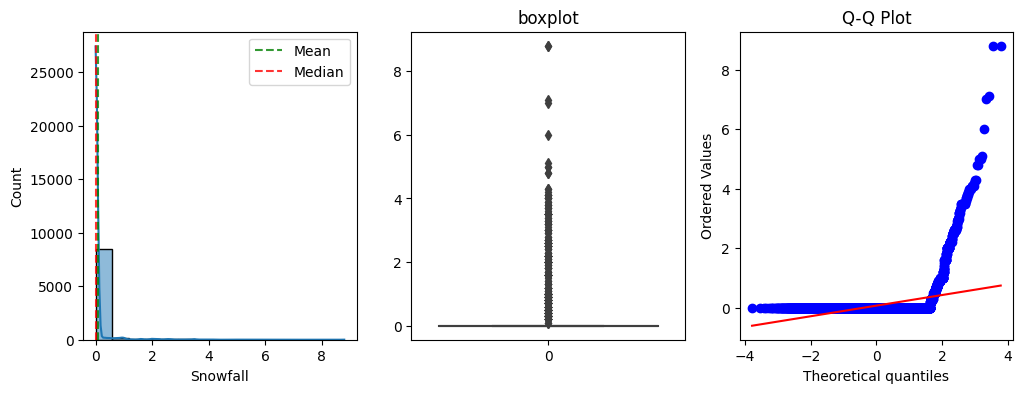

log transformation


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2698: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


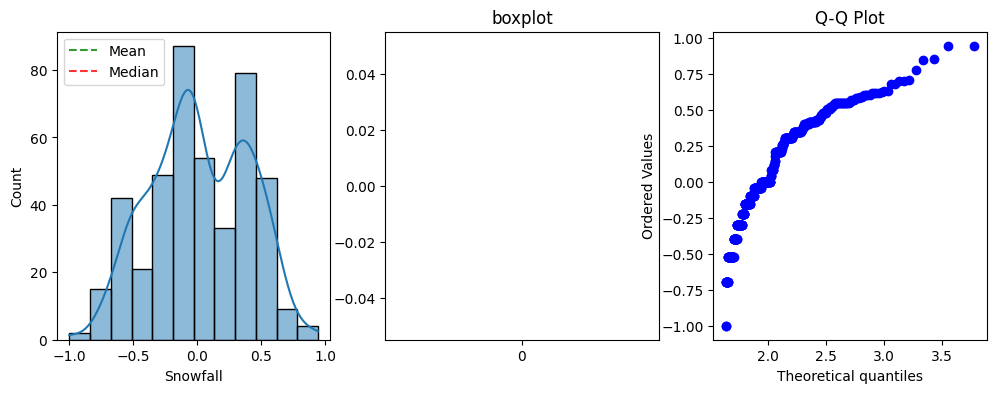

Square root transformation


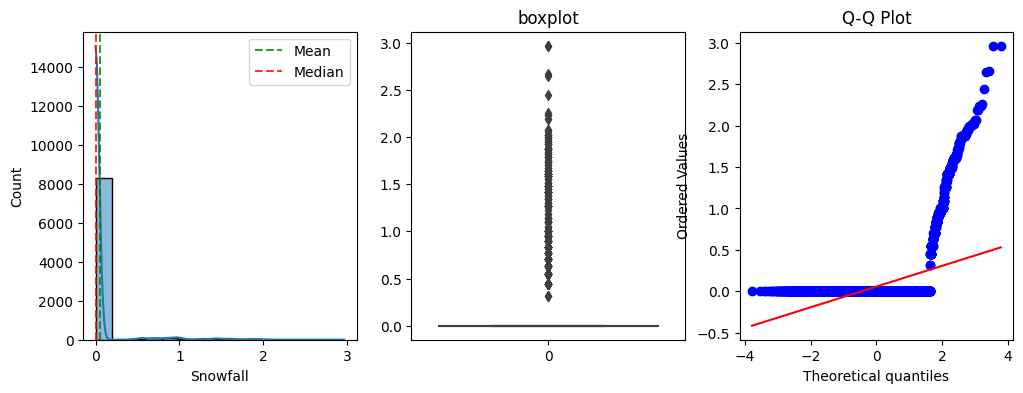

Inverse transformation


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2698: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


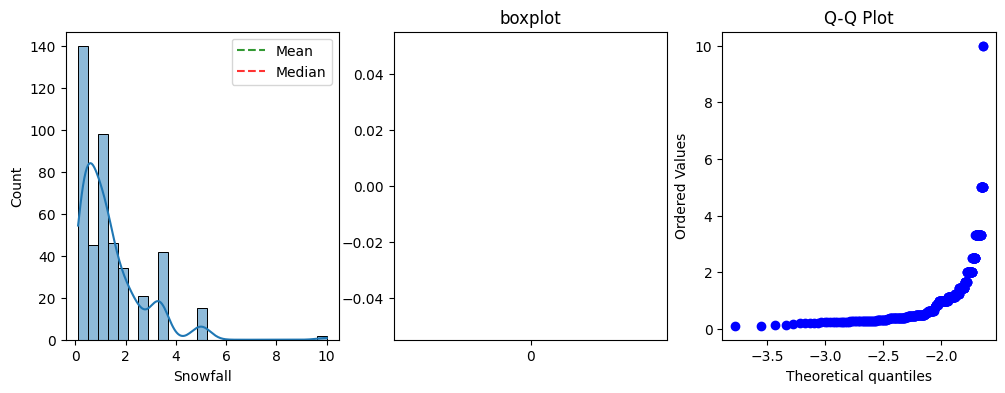

In [100]:
# 'Solar_Radiation', 'Rainfall', 'Snowfall'
feat = 'Snowfall'
test_transformation(feat)

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

- Rented_bike_count: Square root transformation.
- Wind speed: Square root tranformation.
- Temperature and Humidity doesnot required transformation.
- Any transformation doesnot work on Solar_Radiation, Rainfall, Snowfall.

In [ ]:
# Transform Your data

### 8. Data Splitting

In [ ]:
X = df.iloc[:, 1:]
y = df['Rented_Bike_Count']

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y , test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(6948, 15)
(1738, 15)


What data splitting ratio have you used and why?

- We have used 0.2 splitting ratio. That means 80% of the data is used for training and 20% of the data is used for testing the model.

### 6. Data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scaling your data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

## ***7. ML Model Implementation***

##### Import all libraries

In [ ]:
# import all libraries related to ML
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

##### Evaluation metrics

In [ ]:
# Visualizing evaluation Metric Score chart
def eval_metrics(model, X_train, y_train, X_test, y_test):

    # Predict on the model
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print('train_score : ', train_score)
    print('test_score : ', test_score, '\n')

    # MSE
    MSE_train  = mean_squared_error(y_train, train_pred)
    MSE_test  = mean_squared_error(y_test, test_pred)
    print("MSE_train :" , MSE_train)
    print("MSE_test :" , MSE_test, '\n')

    #RMSE
    RMSE_train = np.sqrt(MSE_train)
    RMSE_test = np.sqrt(MSE_test)
    print("RMSE train :" ,RMSE_train)
    print("RMSE test :" ,RMSE_test, '\n')

    #r2_score
    r2_train = r2_score(y_train, train_pred)
    r2_test = r2_score(y_test, test_pred)
    print("R2 train :" ,r2_train)
    print("R2 test :" ,r2_test, '\n')

    #Adjusted R2
    # print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))



### **1. Linear regression**

In [ ]:
# ML Model - 1 Implementation
lr = LinearRegression()

# Fit the Algorithm
lr_model = lr.fit(X_train, y_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
eval_metrics(lr_model, X_train, y_train, X_test, y_test)

train_score :  0.5545391118773229
test_score :  0.5574048389231776 

MSE_train : 185772.05880597423
MSE_test : 184056.25081363486 

RMSE train : 431.01282905033605
RMSE test : 429.0177744728473 

R2 train : 0.5545391118773229
R2 test : 0.5574048389231776 



In [ ]:
plt.figure(figsize=(25,5))
plt.plot(test_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### **2. Polynomial regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features with degree=2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit a linear regression model to the polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
eval_metrics(model, X_train_poly, y_train, X_test_poly, y_test)

train_score :  0.720766434422361
test_score :  0.716276564325603 

MSE_train : 116449.71701938803
MSE_test : 117988.34788690529 

RMSE train : 341.24729598839025
RMSE test : 343.4943200213146 

R2 train : 0.720766434422361
R2 test : 0.716276564325603 



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### **2. Lasso**

In [ ]:
# lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

#fit the model
lasso_model = lasso.fit(X_train, y_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
eval_metrics(lasso_model, X_train, y_train, X_test, y_test)

train_score :  0.5545391118768843
test_score :  0.5574048463496253 

MSE_train : 185772.05880615712
MSE_test : 184056.24772529537 

RMSE train : 431.01282905054825
RMSE test : 429.01777087353315 

R2 train : 0.5545391118768843
R2 test : 0.5574048463496253 



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, cv=5)

# Fit the Algorithm
lasso_regressor.fit(X_train, y_train)

In [ ]:
eval_metrics(lasso_regressor, X_train, y_train, X_test, y_test)

train_score :  0.5545385371317337
test_score :  0.5574098963650229 

MSE_train : 185772.29849406856
MSE_test : 184054.14764155657 

RMSE train : 431.0131071024042
RMSE test : 429.0153233178934 

R2 train : 0.5545385371317337
R2 test : 0.5574098963650229 



##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

##### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### **3. Ridge**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [ ]:
eval_metrics(ridge, X_train, y_train, X_test, y_test)

train_score :  0.5545390826516987
test_score :  0.5574046634810206 

MSE_train : 185772.07099403496
MSE_test : 184056.32377246604 

RMSE train : 431.0128431891966
RMSE test : 429.01785950291867 

R2 train : 0.5545390826516987
R2 test : 0.5574046634810206 



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, cv=3)

# Fit the Algorithm
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]})

In [ ]:
eval_metrics(ridge_regressor, X_train, y_train, X_test, y_test)

train_score :  0.5545277939052897
test_score :  0.5573896261587155 

MSE_train : 185776.77877807987
MSE_test : 184062.57714667605 

RMSE train : 431.0183044582676
RMSE test : 429.02514745254274 

R2 train : 0.5545277939052897
R2 test : 0.5573896261587155 



##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### **4. Elasticnet**

In [ ]:

#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
eval_metrics(elasticnet, X_train, y_train, X_test, y_test)

train_score :  0.5523399829976483
test_score :  0.55497057136726 

MSE_train : 186689.16895065721
MSE_test : 185068.55776866205 

RMSE train : 432.07542044260884
RMSE test : 430.1959527571849 

R2 train : 0.5523399829976483
R2 test : 0.55497057136726 



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
elastic = ElasticNet()
param = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],
         'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}

elastic_regressor = GridSearchCV(elastic, param, cv = 5)

# Fit the Algorithm
elastic_regressor.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.156e+08, tolerance: 2.334e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.106e+08, tolerance: 2.323e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.202e+08, tolerance: 2.305e

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]})

In [ ]:
eval_metrics(elastic_regressor, X_train, y_train, X_test, y_test)

train_score :  0.5545334306832213
test_score :  0.5573977422760641 

MSE_train : 185774.42805353974
MSE_test : 184059.20200329061 

RMSE train : 431.0155775068225
RMSE test : 429.0212139315381 

R2 train : 0.5545334306832213
R2 test : 0.5573977422760641 



##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### **5. Decision tree regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(max_leaf_nodes=15, random_state = 20)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=15, random_state=20)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
eval_metrics(dtree, X_train, y_train, X_test, y_test)

train_score :  0.7170951914314716
test_score :  0.6952219556699222 

MSE_train : 117980.74788422722
MSE_test : 126744.05213383958 

RMSE train : 343.4832570653586
RMSE test : 356.0113089971154 

R2 train : 0.7170951914314716
R2 test : 0.6952219556699222 



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
dtree = DecisionTreeRegressor()
params = {'max_leaf_nodes': [None, 10 , 20, 30],
          'max_depth': [None, 5, 7, 10, 20, 30],}

tree_regressor = GridSearchCV(dtree, params, cv = 5)

# Fit the Algorithm
tree_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 5, 7, 10, 20, 30],
                         'max_leaf_nodes': [None, 10, 20, 30]})

In [ ]:
eval_metrics(tree_regressor, X_train, y_train, X_test, y_test)

train_score :  0.8817050952703375
test_score :  0.8026766774125119 

MSE_train : 49332.92368382736
MSE_test : 82058.26486033037 

RMSE train : 222.1101611449313
RMSE test : 286.45813805917675 

R2 train : 0.8817050952703375
R2 test : 0.8026766774125119 



In [ ]:
best_params = tree_regressor.best_params_
best_params

{'max_depth': 10, 'max_leaf_nodes': None}

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### **6. Random forest**

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor


# Create a Random Forest Regressor object with optional hyperparameters
rf_regressor = RandomForestRegressor(
    n_estimators=100,  # Number of trees in the forest
    max_depth=None,    # Maximum depth of the tree
    min_samples_split=2,  # Minimum number of samples required to split an internal node
    min_samples_leaf=1    # Minimum number of samples required to be at a leaf node
    # You can include other hyperparameters as needed
)

# Fit the Random Forest Regressor to the training data
rf_regressor.fit(X_train, y_train)


RandomForestRegressor()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
eval_metrics(rf_regressor, X_train, y_train, X_test, y_test)

train_score :  0.9830337242497534
test_score :  0.8801149338108509 

MSE_train : 7075.503283074266
MSE_test : 49855.031757767545 

RMSE train : 84.1160108604436
RMSE test : 223.28240360083808 

R2 train : 0.9830337242497534
R2 test : 0.8801149338108509 



In [ ]:
# Access other information about the trained model, such as feature importances
feature_importances = rf_regressor.feature_importances_
print("Feature Importances:", feature_importances)


Feature Importances: [0.28509233 0.32242848 0.07394277 0.01872321 0.01783488 0.09513087
 0.0459918  0.00054385 0.0026813  0.08611256 0.01984474 0.01629403
 0.00246651 0.00170675 0.01120592]


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
rf_regressor = RandomForestRegressor(random_state=42)

# Define hyperparameters and their respective values to search
param_grid = {
    'n_estimators': [70, 100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create a GridSearchCV object with the Random Forest Regressor and parameter grid
rf_grid = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV to your data
rf_grid.fit(X, y)



GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [70, 100, 200, 300]})

In [ ]:
# Visualizing evaluation Metric Score chart
eval_metrics(rf_grid, X_train, y_train, X_test, y_test)

train_score :  -0.7594503287921646
test_score :  -0.7690503292617883 

MSE_train : 733749.513507355
MSE_test : 735671.7825661788 

RMSE train : 856.5918009806976
RMSE test : 857.7131120404881 

R2 train : -0.7594503287921646
R2 test : -0.7690503292617883 



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters: ", rf_grid.best_params_)
print("Best Score: ", rf_grid.best_score_)

# Access the best trained model
best_rf_model = rf_grid.best_estimator_


Best Hyperparameters:  {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 70}
Best Score:  0.10701973821699262


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### **7. XGBoost**

In [ ]:
import xgboost as xgb

xgb_regressor = xgb.XGBRegressor(
    n_estimators=100,      # Number of boosting rounds (trees)
    max_depth=3,           # Maximum depth of each tree
    learning_rate=0.1,     # Step size shrinkage to prevent overfitting
    objective='reg:squarederror'  # Regression objective function
    # You can include other hyperparameters as needed
)

# Fit the XGBoost Regressor to the training data
xgb_regressor.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
eval_metrics(xgb_regressor, X_train, y_train, X_test, y_test)

train_score :  0.8602405771102853
test_score :  0.8405201548568 

MSE_train : 58284.344192765435
MSE_test : 66320.79371582091 

RMSE train : 241.4215073119324
RMSE test : 257.5282386765011 

R2 train : 0.8602405771102853
R2 test : 0.8405201548568 



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Create an XGBoost Regressor object
xgb_regressor = xgb.XGBRegressor()

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],          # Number of boosting rounds (trees)
    'max_depth': [3, 4, 5],                   # Maximum depth of each tree
    'learning_rate': [0.01, 0.1, 0.2],       # Step size shrinkage to prevent overfitting
    'objective': ['reg:squarederror']         # Regression objective function
    # Add other hyperparameters and their ranges as needed
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'objective': ['reg:squarederror']},
             scoring='neg_mean_squared_error')

In [ ]:
# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new XGBoost Regressor with the best hyperparameters
best_xgb_regressor = xgb.XGBRegressor(**best_params)

# Fit the best model to the training data
best_xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
eval_metrics(best_xgb_regressor, X_train, y_train, X_test, y_test)

train_score :  0.9497327019473092
test_score :  0.8772248016510255 

MSE_train : 20963.141094645805
MSE_test : 51056.9131529441 

RMSE train : 144.78653630308932
RMSE test : 225.95776851647324 

R2 train : 0.9497327019473092
R2 test : 0.8772248016510255 



##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***